In [80]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"bnc_initialize.jl")
Threads.nthreads() # check number of threads

  Activating project at `~/Realizibility_index/bnc_julia`


24

In [47]:
q_sym = [:qE, :qS]
K_sym1 = [:K₁, :K₂]
K_sym2 = [:K_S, :K_E]
x_sym1 = [:E, :S, :C₁, :C₂]
x_sym2 = [:E, :S, :C_S, :C₂]
N1 =     [1  1  -1  0;
           0  1  1  -1]
N2 =     [0  2  -1  0;
           1  0  1  -1]
model1 = Bnc(N=N1, x_sym=x_sym1, q_sym=q_sym, K_sym=K_sym1)
model2 = Bnc(N=N2, x_sym=x_sym2, q_sym=q_sym, K_sym=K_sym2)

find_all_vertices!(model1)
find_all_vertices!(model2)
summary(model1)
summary(model2)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 8 vertices found and 7 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 6 vertices found and 6 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 4
Number of conserved quantities (d): 2
Number of reactions (r): 2
L matrix: [1 0 1 1; 0 1 1 2]
N matrix: [1 1 -1 0; 0 1 1 -1]
Direction of binding reactions: forward
Cataly

In [283]:
show_conservation(model2)

2-element Vector{Equation}:
 qE ~ C₂ + E
 qS ~ 2C_S + 2C₂ + S

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 5
[ Info: All regimes converged after 2400000 samples.
[ Info: Total samples: 2400000, Elapsed: 0.69 s


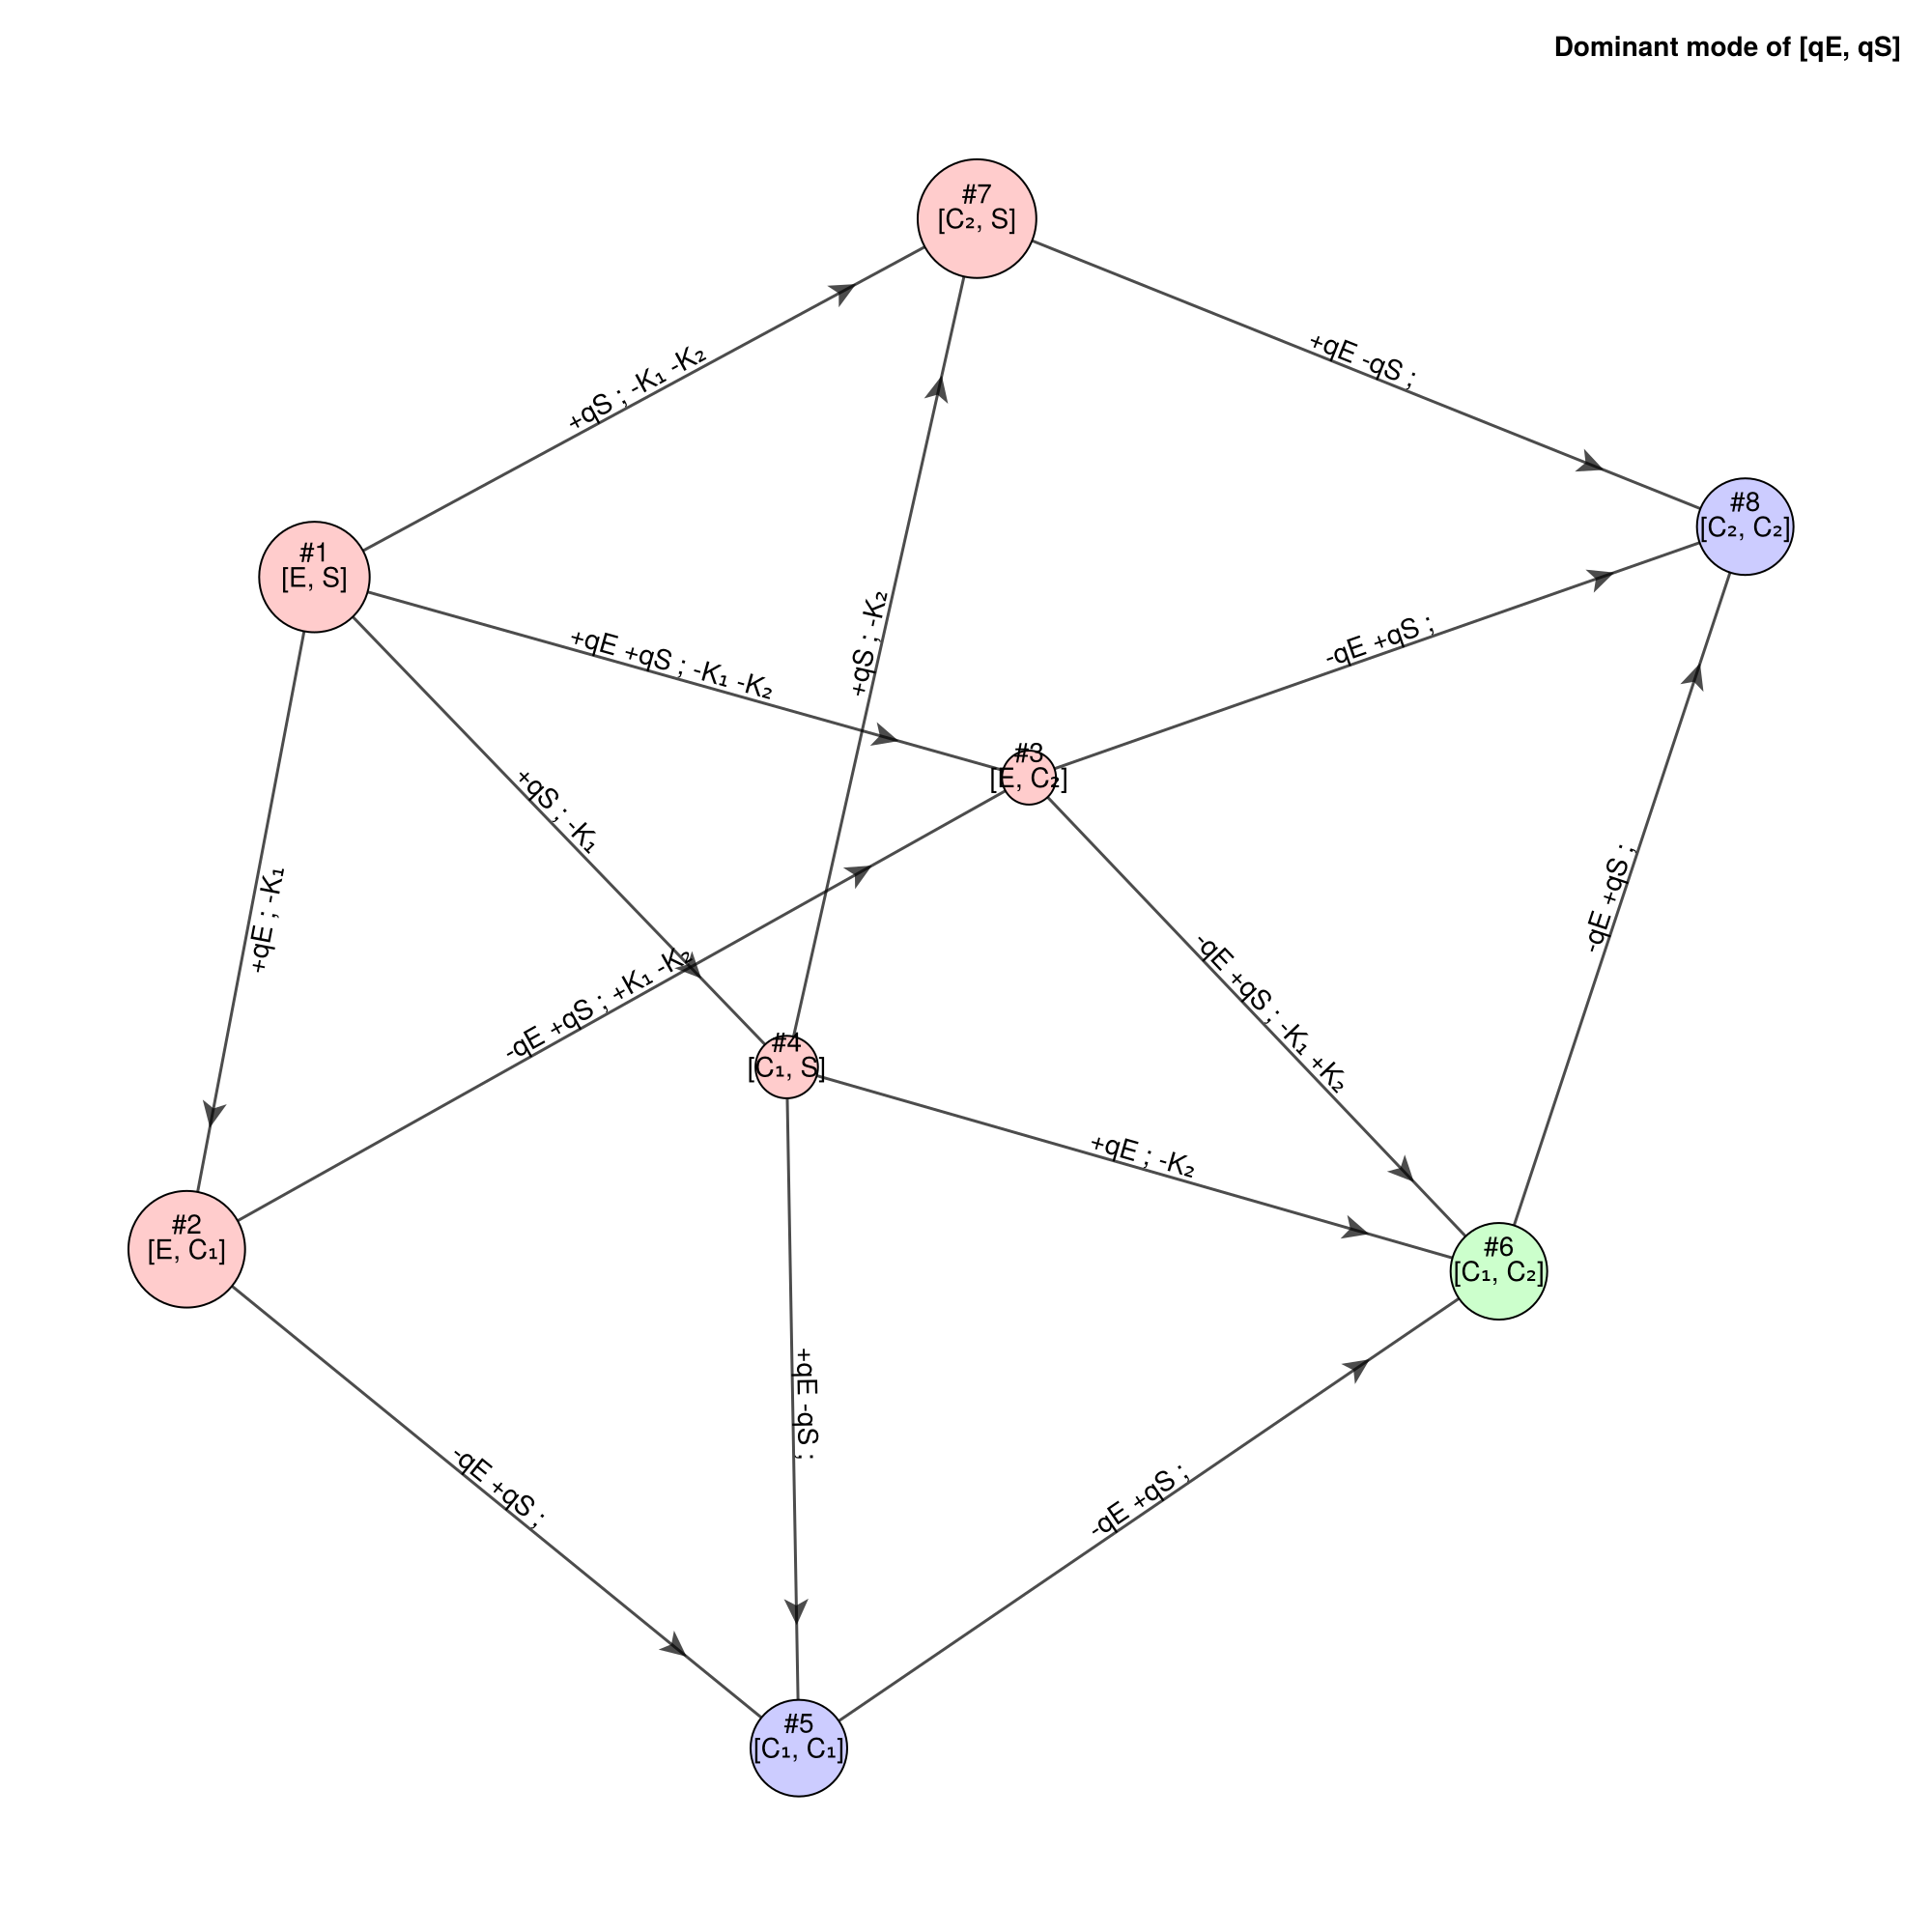

CairoMakie.Screen{IMAGE}


In [7]:
f,ax,p = draw_vertices_neighbor_graph(model1)
add_vertices_idx!(ax,p)
display(f)

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 5
[ Info: All regimes converged after 2800000 samples.
[ Info: Total samples: 2800000, Elapsed: 0.79 s


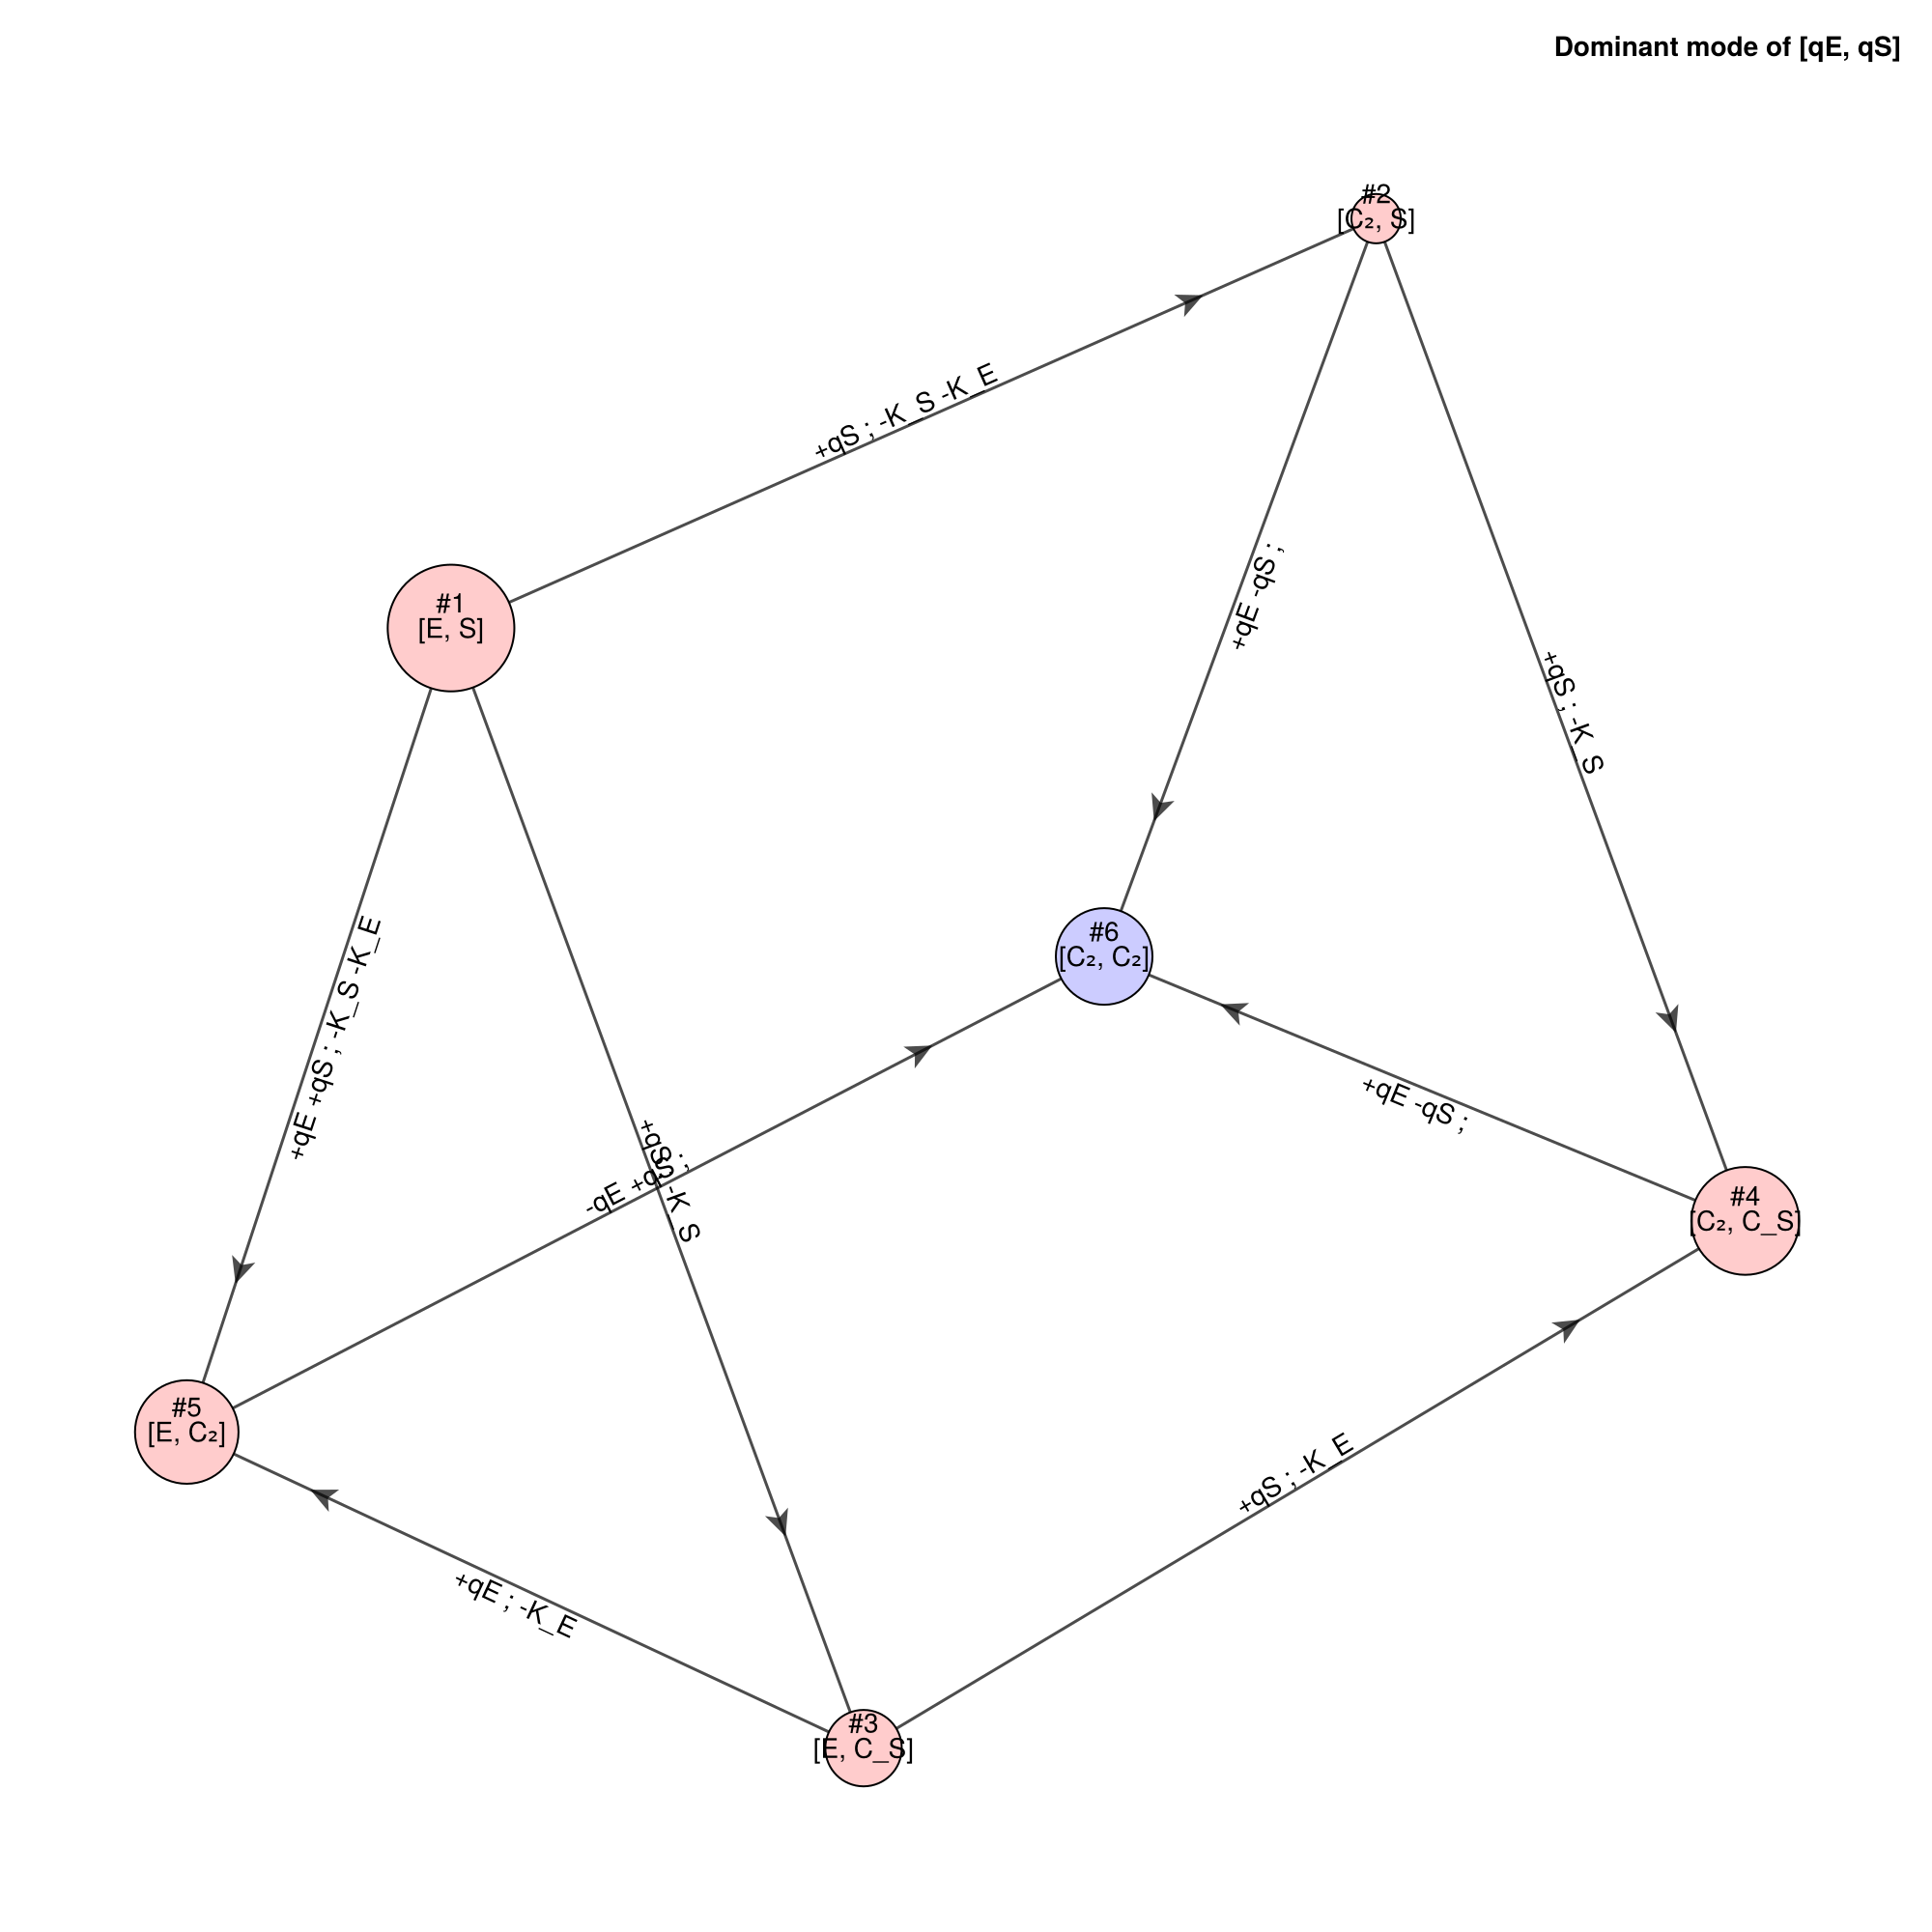

CairoMakie.Screen{IMAGE}


In [8]:
f,ax,p = draw_vertices_neighbor_graph(model2)
add_vertices_idx!(ax,p)
display(f)

In [48]:
grh1 = SISO_graph(model1, :qS)
grh2 = SISO_graph(model2, :qS)

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: sources: [2, 1]
[ Info: sinks: [7]
[ Info: sources: [1]
[ Info: sinks: [4]


SISO_graph{Int8}(Bnc{Int8}([0 2 -1 0; 1 0 1 -1], [1 0 0 1; 0 1 2 2], 2, 4, 2, Num[E, S, C_S, C₂], Num[qE, qS], Num[K_S, K_E], nothing, Vector{Int8}[[1, 2], [4, 2], [1, 3], [4, 3], [1, 4], [4, 4]], Dict{Vector{Int8}, Int64}([4, 2] => 2, [1, 3] => 3, [1, 4] => 5, [1, 2] => 1, [4, 3] => 4, [4, 4] => 6), Bool[1, 1, 1, 1, 1, 1], Int8[0, 0, 0, 0, 0, 1], VertexGraph{Int8}(SimpleGraph{Int64}(9, [[2, 3, 5], [1, 4, 6], [1, 4, 5], [2, 3, 6], [1, 3, 6], [2, 4, 5]]), Vector{VertexEdge{Int8}}[[VertexEdge{Int8}(2, 1, sparsevec(Int8[1, 4], Int8[-1, 1], 4), sparsevec(Int8[2, 3, 4], [2.0, -1.0, -1.0], 4)), VertexEdge{Int8}(3, 2, sparsevec(Int8[2, 3], Int8[-1, 1], 4), sparsevec(Int8[2, 3], [1.0, -1.0], 4)), VertexEdge{Int8}(5, 2, sparsevec(Int8[2, 4], Int8[-1, 1], 4), sparsevec(Int8[1, 2, 3, 4], [1.0, 1.0, -1.0, -1.0], 4))], [VertexEdge{Int8}(1, 1, sparsevec(Int8[1, 4], Int8[1, -1], 4), sparsevec(Int8[2, 3, 4], [-2.0, 1.0, 1.0], 4)), VertexEdge{Int8}(4, 2, sparsevec(Int8[2, 3], Int8[-1, 1], 4), sparsevec

In [78]:
pths = summary_path(grh1, :C₂;deduplicate=true, keep_singular=true, keep_nonasymptotic=false) |> render_path

Path 1:  2 → 1 → 0	 | Volume: 0.4163 ± 0.002
Path 2:  2 → 0	 | Volume: 0.2508 ± 0.0012
Path 3:  2 → Inf → 1 → 0	 | Volume: 0.1671 ± 0.0008
Path 4:  2 → Inf → 0	 | Volume: 0.1662 ± 0.0008


In [81]:
summary_path(grh1, :C₂)

LoadError: KeyError: key [2.0, 0.0] not found

In [12]:
collect(edges(grh1.qK_grh))[1] |>typeof |> fieldnames

(:src, :dst)

In [25]:
a = [rand(5) for i in 1:10]

10-element Vector{Vector{Float64}}:
 [0.7405829459988286, 0.6414458929258329, 0.5436335453264104, 0.4768425593290213, 0.36044752277231107]
 [0.7107753647486762, 0.71106353266651, 0.6998364318940576, 0.9601376547244106, 0.4042291793184061]
 [0.7411384859114443, 0.7885789788313384, 0.4316831524464142, 0.03266281724584397, 0.30724701325805004]
 [0.1155050933415478, 0.5278843992612485, 0.7209344294494862, 0.6182975302682293, 0.22350824364788002]
 [0.6743138302662353, 0.919112762772588, 0.40474570722968994, 0.3528582364693795, 0.9860337908796212]
 [0.6343415066471408, 0.23815522725813443, 0.5567388514410528, 0.8475393919977826, 0.401927070942115]
 [0.3115401659925472, 0.6034439800795962, 0.4863697764672993, 0.8196920450960006, 0.5130044571895767]
 [0.9294168845145193, 0.8983473852692113, 0.5054301107997854, 0.760418410309941, 0.7588217517348732]
 [0.14452349217010108, 0.40538522904956564, 0.9449451521615376, 0.6659539214493377, 0.23334511503474598]
 [0.9033893531696802, 0.23954264514163182,

In [38]:
a = vcat(collect.(Iterators.partition.(a, 2))...)

30-element Vector{SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}}:
 [0.7405829459988286, 0.6414458929258329]
 [0.5436335453264104, 0.4768425593290213]
 [0.36044752277231107]
 [0.7107753647486762, 0.71106353266651]
 [0.6998364318940576, 0.9601376547244106]
 [0.4042291793184061]
 [0.7411384859114443, 0.7885789788313384]
 [0.4316831524464142, 0.03266281724584397]
 [0.30724701325805004]
 [0.1155050933415478, 0.5278843992612485]
 [0.7209344294494862, 0.6182975302682293]
 [0.22350824364788002]
 [0.6743138302662353, 0.919112762772588]
 ⋮
 [0.3115401659925472, 0.6034439800795962]
 [0.4863697764672993, 0.8196920450960006]
 [0.5130044571895767]
 [0.9294168845145193, 0.8983473852692113]
 [0.5054301107997854, 0.760418410309941]
 [0.7588217517348732]
 [0.14452349217010108, 0.40538522904956564]
 [0.9449451521615376, 0.6659539214493377]
 [0.23334511503474598]
 [0.9033893531696802, 0.23954264514163182]
 [0.1693156625636979, 0.6271709858374437]
 [0.7900421394178584]

In [54]:
div(3,2)

1

In [47]:
Set{Vector{Float64}}(a)

Set{Vector{Float64}} with 30 elements:
  [0.5567388514410528, 0.8475393919977826]
  [0.3115401659925472, 0.6034439800795962]
  [0.6998364318940576, 0.9601376547244106]
  [0.22350824364788002]
  [0.7588217517348732]
  [0.401927070942115]
  [0.9449451521615376, 0.6659539214493377]
  [0.23334511503474598]
  [0.4042291793184061]
  [0.14452349217010108, 0.40538522904956564]
  [0.40474570722968994, 0.3528582364693795]
  [0.7107753647486762, 0.71106353266651]
  [0.7900421394178584]
  [0.5054301107997854, 0.760418410309941]
  [0.7209344294494862, 0.6182975302682293]
  [0.9294168845145193, 0.8983473852692113]
  [0.7405829459988286, 0.6414458929258329]
  [0.1693156625636979, 0.6271709858374437]
  [0.4863697764672993, 0.8196920450960006]
  [0.36044752277231107]
  [0.5436335453264104, 0.4768425593290213]
  [0.9860337908796212]
  [0.4316831524464142, 0.03266281724584397]
  [0.1155050933415478, 0.5278843992612485]
  [0.6343415066471408, 0.23815522725813443]
  ⋮ 

In [29]:
(collect.(Iterators.partition.(a, 2)))[:]

10-element Vector{Vector{SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}}}:
 [[0.7405829459988286, 0.6414458929258329], [0.5436335453264104, 0.4768425593290213], [0.36044752277231107]]
 [[0.7107753647486762, 0.71106353266651], [0.6998364318940576, 0.9601376547244106], [0.4042291793184061]]
 [[0.7411384859114443, 0.7885789788313384], [0.4316831524464142, 0.03266281724584397], [0.30724701325805004]]
 [[0.1155050933415478, 0.5278843992612485], [0.7209344294494862, 0.6182975302682293], [0.22350824364788002]]
 [[0.6743138302662353, 0.919112762772588], [0.40474570722968994, 0.3528582364693795], [0.9860337908796212]]
 [[0.6343415066471408, 0.23815522725813443], [0.5567388514410528, 0.8475393919977826], [0.401927070942115]]
 [[0.3115401659925472, 0.6034439800795962], [0.4863697764672993, 0.8196920450960006], [0.5130044571895767]]
 [[0.9294168845145193, 0.8983473852692113], [0.5054301107997854, 0.760418410309941], [0.7588217517348732]]
 [[0.14452349217010108, 0.405385229049

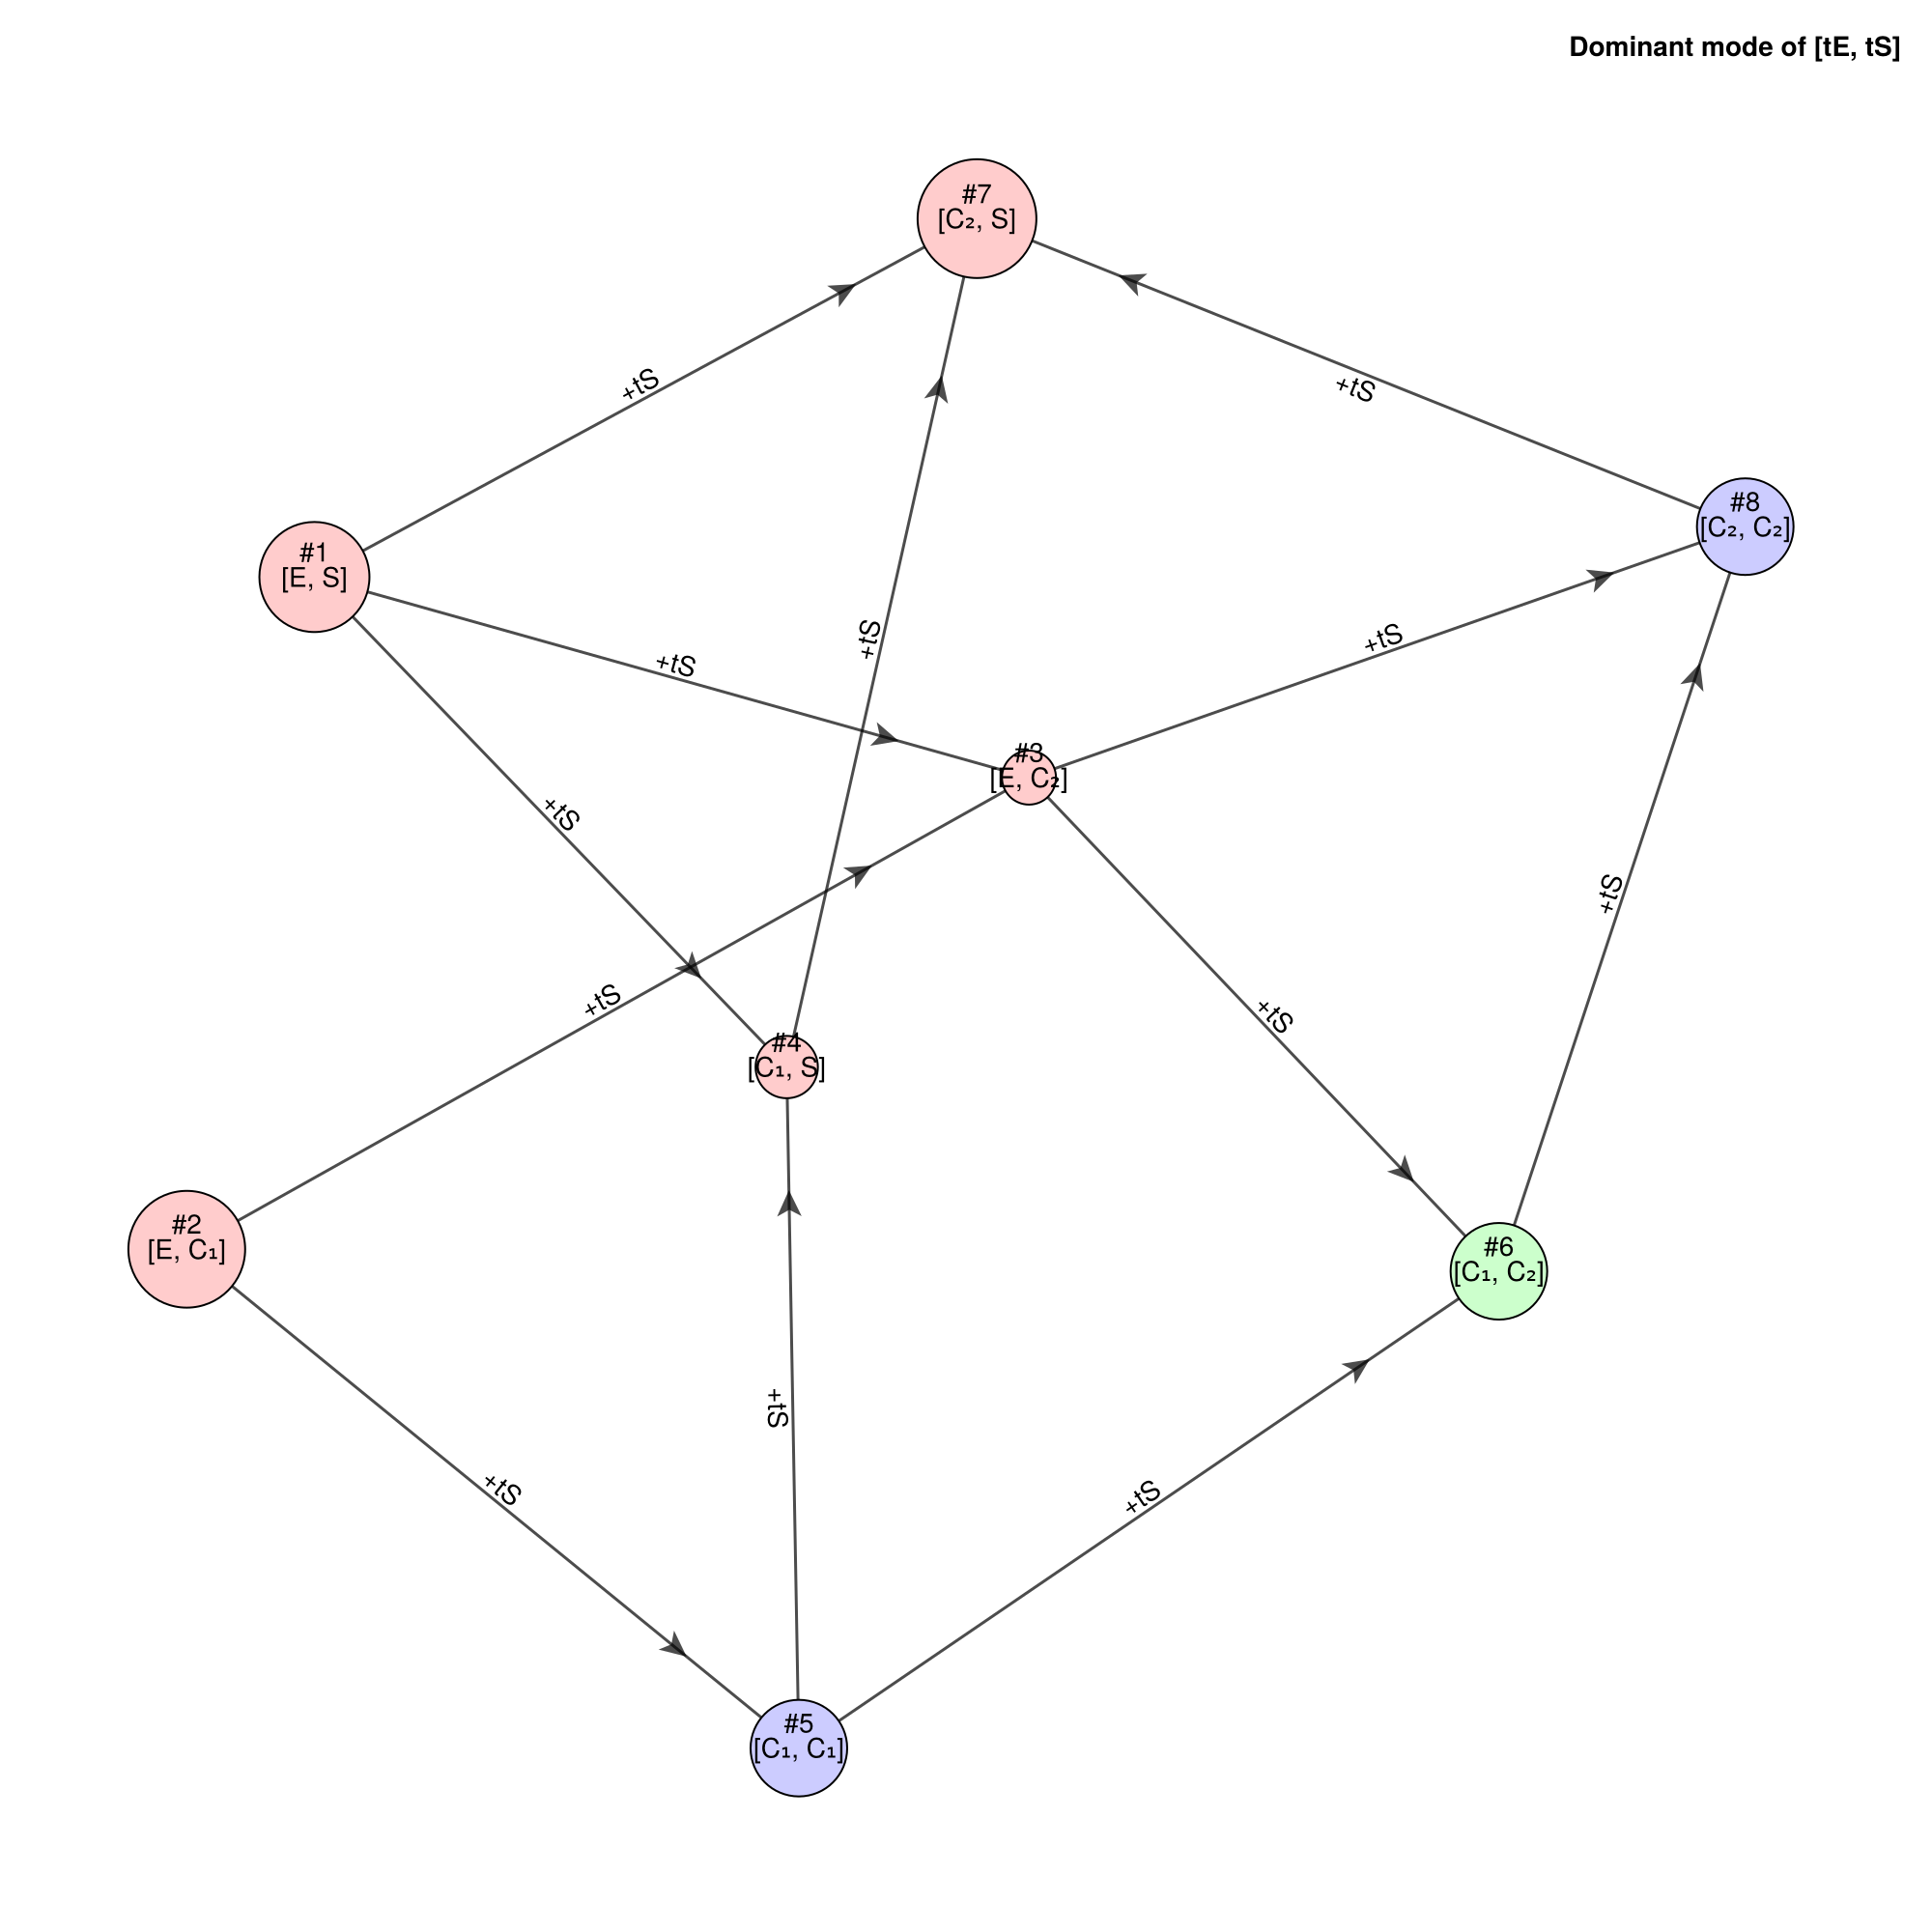

CairoMakie.Screen{IMAGE}


In [129]:
f,ax,p = draw_vertices_neighbor_graph(grh1)
add_vertices_idx!(ax,p)
display(f)

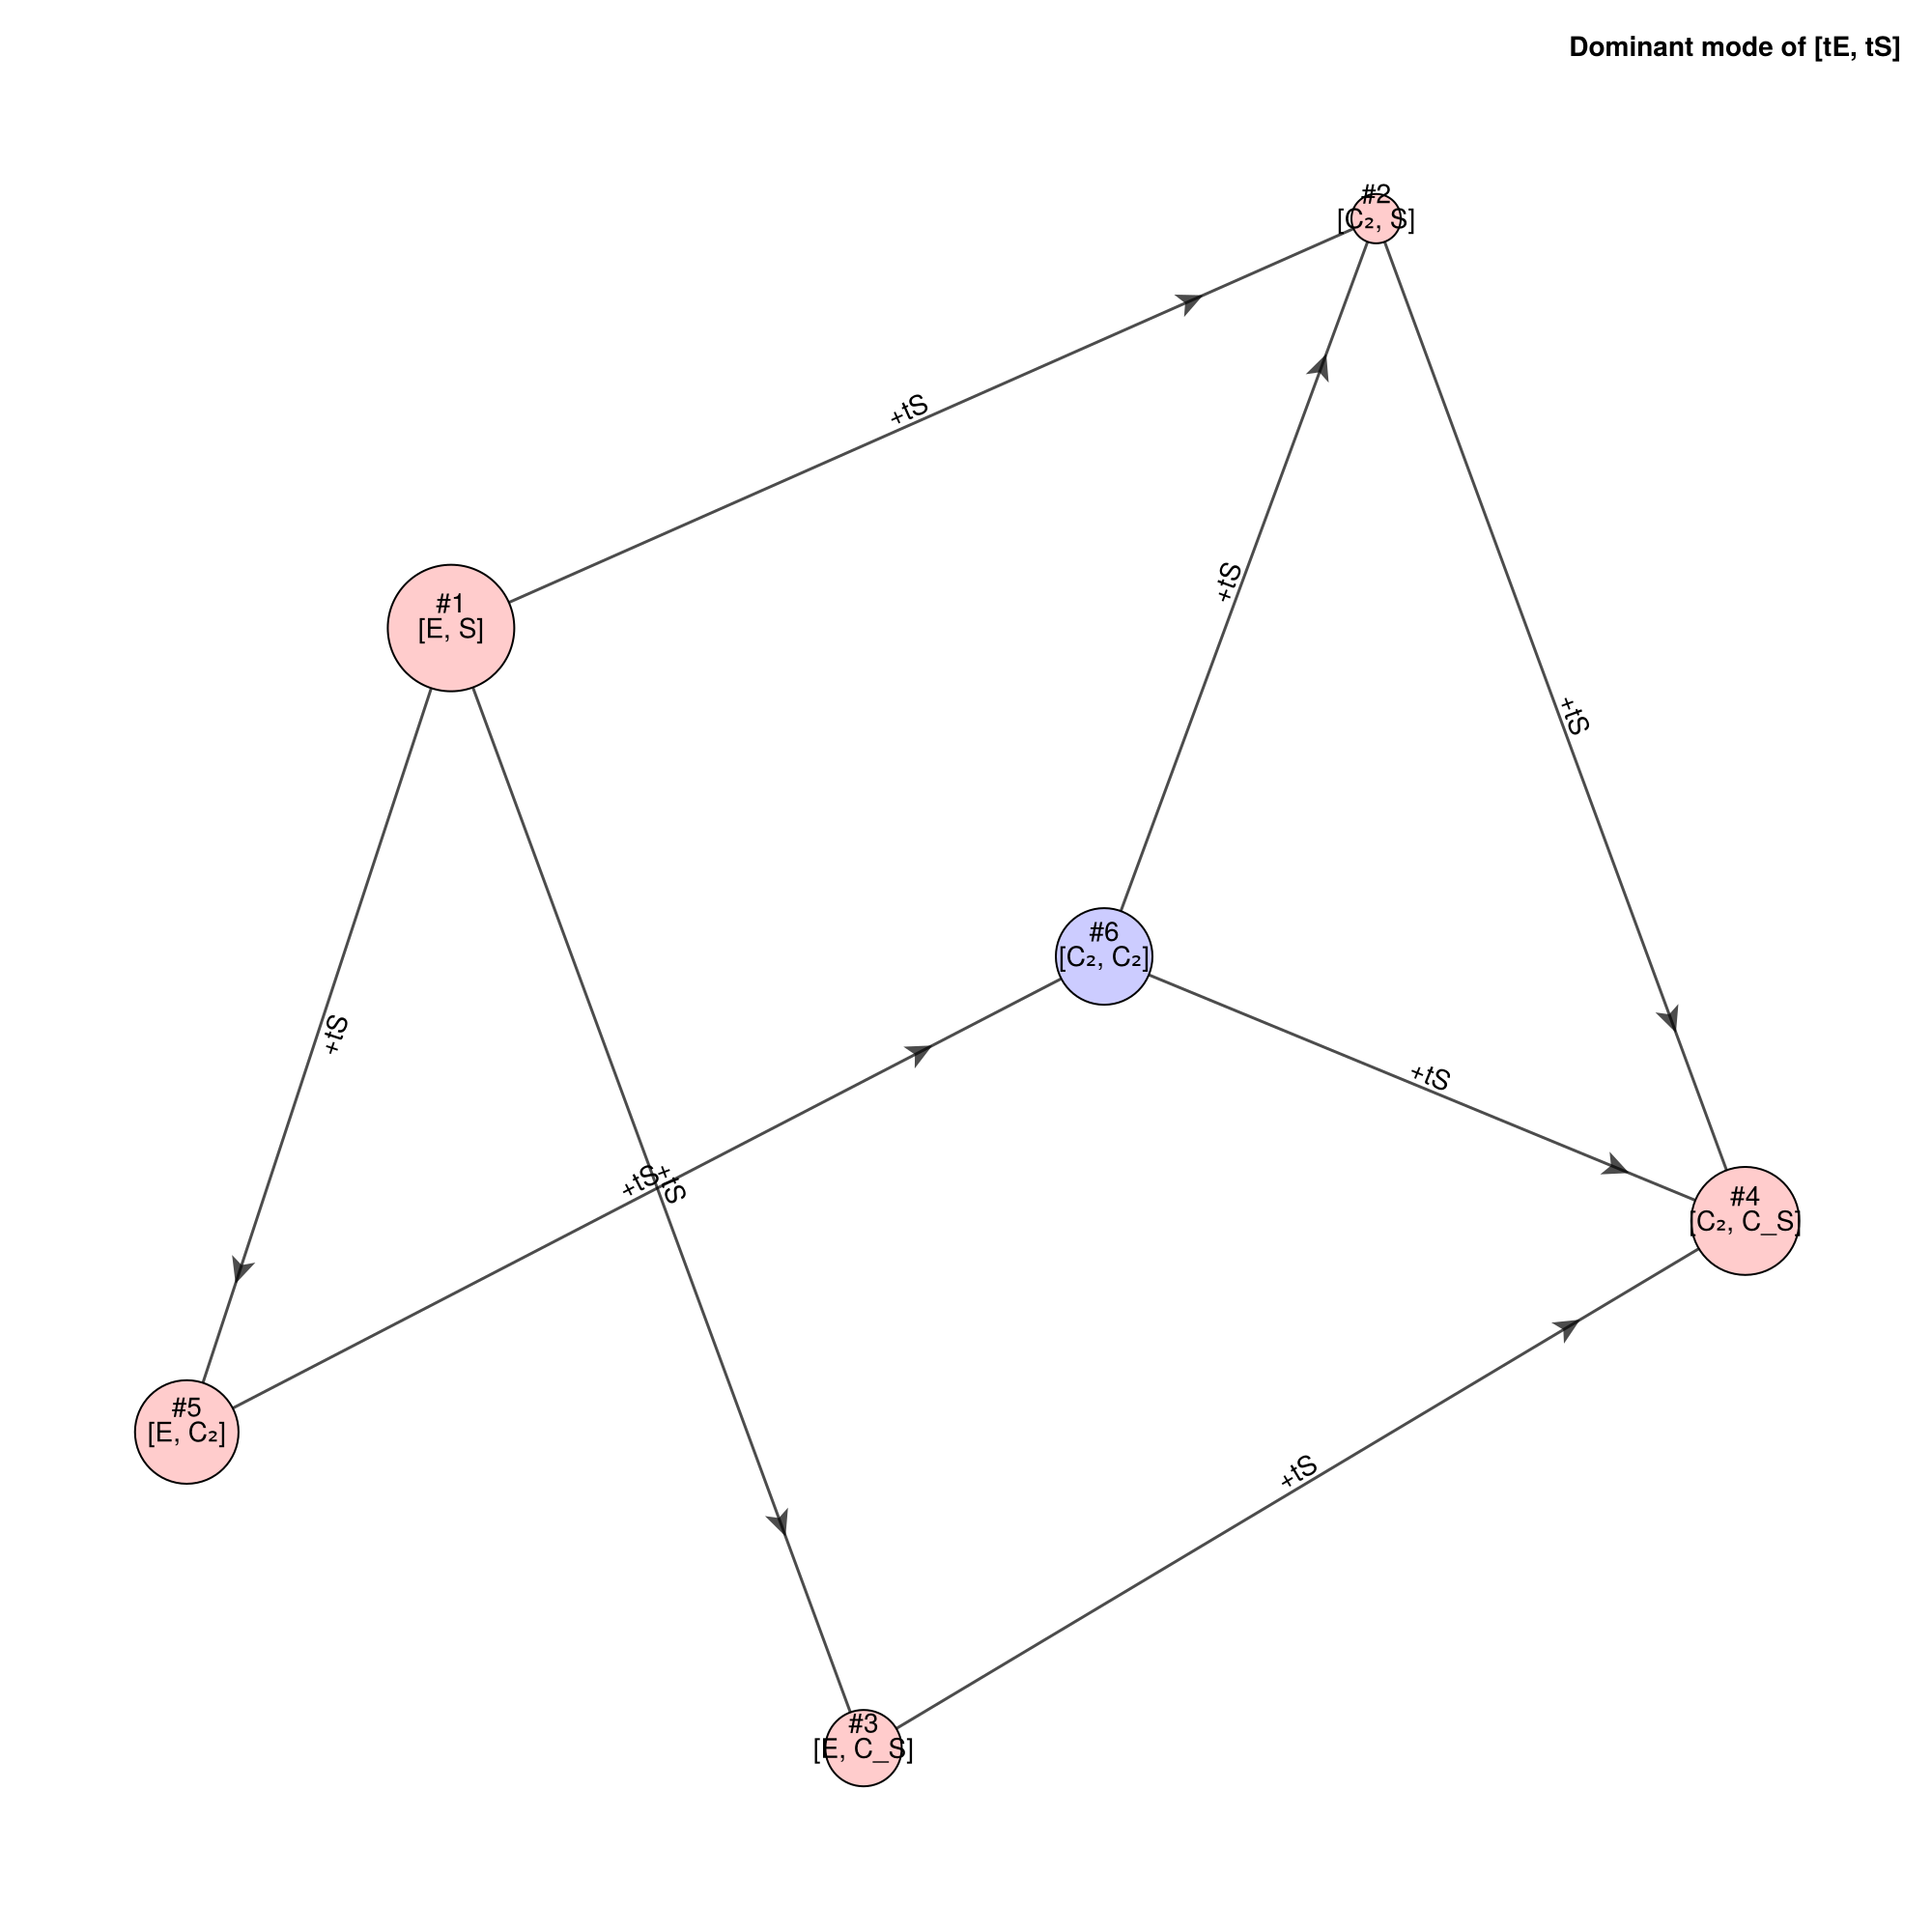

CairoMakie.Screen{IMAGE}


In [130]:
f,ax,p = draw_vertices_neighbor_graph(grh2)
add_vertices_idx!(ax,p)
display(f)

In [4]:
find_reaction_order_for_path(grh1,:C₂;keep_singular=true,keep_nonasymptotic=true)

8-element Vector{Vector{<:Real}}:
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]
 [2.0, Inf, 1.0, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0]

In [5]:
grh1.rgm_paths

8-element Vector{Vector{Int64}}:
 [1, 3, 6, 8, 7]
 [1, 3, 8, 7]
 [1, 4, 7]
 [1, 7]
 [2, 3, 6, 8, 7]
 [2, 3, 8, 7]
 [2, 5, 4, 7]
 [2, 5, 6, 8, 7]

In [13]:
? end

search: end ecdf secd Legend rand cond band Menu expand meanad read Band render



  end

  end marks the conclusion of a block of expressions, for example module,
  struct, mutable struct, begin, let, for etc.

  end may also be used when indexing to represent the last index of a
  collection or the last index of a dimension of an array.

  Examples
  ≡≡≡≡≡≡≡≡

  julia> A = [1 2; 3 4]
  2×2 Array{Int64, 2}:
   1  2
   3  4
  
  julia> A[end, :]
  2-element Array{Int64, 1}:
   3
   4

In [291]:
show_dominant_condition(model1,7)

2-element Vector{Equation}:
 log10(qE) ~ log10(C₂)
 log10(qS) ~ log10(S)

In [299]:
show_condition_qK(model1,7,log_space=false)

4-element Vector{Num}:
 (qS^2.0) > (K₁*K₂)
            qS > K₂
 (qS^2.0) > (K₂*qE)
       (0.5qS) > qE

In [307]:
get_volume!(model1,7,recalculate=true, rel_tol=0.001)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 8900000 samples.
[ Info: Total samples: 8900000, Elapsed: 0.82 s


(0.30215828764053837, 0.0003016815108988152)

Set{Int64} with 2 elements:
  2
  1

In [61]:
show_condition_path(g2,4;log_space=false)

3-element Vector{Num}:
      K₂ > qS
      qS > K₁
 (2.0K₁) > K₂

In [308]:
show_condition_path(grh1,4;log_space=false)

2-element Vector{Num}:
                K₁ > K₂
 (0.25K₁*K₂) > (qE^2.0)

In [295]:
(expr, bounds) = get_expression_for_path(grh1, 4, :C₂; log_space=false)
expr .|> display
println("----------")
bounds .|> display

(qE*(qS^2.0)) / (K₁*K₂)

qE

----------


(K₁^0.5)*(K₂^0.5)

1-element Vector{Nothing}:
 nothing

In [134]:
show_condition_qK(model1,1;log_space=false)

4-element Vector{Num}:
              K₁ > tS
   (K₁*K₂) > (tS^2.0)
              K₁ > tE
 (0.5K₁*K₂) > (tE*tS)

In [135]:
show_condition_qK(model1,7;log_space=false)

4-element Vector{Num}:
 (tS^2.0) > (K₁*K₂)
            tS > K₂
 (tS^2.0) > (K₂*tE)
       (0.5tS) > tE

In [136]:
get_volume!(model1,1)[1] + get_volume!(model1,7)[1]

0.5619507451536807

In [311]:
calc_volume(grh1.rgm_polys[4], rel_tol=0.001,asymptotic=true)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 11600000 samples.
[ Info: Total samples: 11600000, Elapsed: 0.89 s


(0.2500018931342614, 0.00024918433265469)

In [137]:
grh1.rgm_volume[4]

0.24993792120635658

In [138]:
show_condition_path(grh1, 4;log_space=false)

2-element Vector{Num}:
                K₁ > K₂
 (0.25K₁*K₂) > (tE^2.0)

In [139]:
polyhe = intersect(get_polyhedra(model1,1), get_polyhedra(model1,7))
polyhe2 = eliminate(polyhe, BitSet(2))
detecthlinearity!(polyhe2)
removevredundancy!(polyhe2)

show_condition_poly(polyhe2, [model1.q_sym; model1.K_sym]|> x-> deleteat!(x, 2); log_space=false)

12-element Vector{Num}:
                 (0.5K₁) > tE
           (K₁^2.0) > (K₂*tE)
                      K₁ > K₂
                      K₁ > K₂
                      K₁ > K₂
                      K₁ > tE
       (0.25K₁*K₂) > (tE^2.0)
       (0.25K₁*K₂) > (tE^2.0)
                 (0.5K₁) > tE
 (0.25(K₁^2.0)*K₂) > (tE^3.0)
       (0.25K₁*K₂) > (tE^2.0)
                      K₁ > tE

In [312]:
grh2.rgm_paths

4-element Vector{Vector{Int64}}:
 [1, 2, 4]
 [1, 3, 4]
 [1, 5, 6, 2, 4]
 [1, 5, 6, 4]

In [313]:
find_reaction_order_for_path(grh2,:C₂;keep_singular=true,keep_nonasymptotic=true)

4-element Vector{Vector{<:Real}}:
 [2.0, 0.0, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]

In [314]:
grh2.rgm_volume

4-element Vector{Float64}:
 0.25045391724200156
 0.33316410223307763
 0.08352094111009084
 0.33300660374563756

In [335]:
calc_volume(model2,4,rel_tol=0.0005)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 46100000 samples.
[ Info: Total samples: 46100000, Elapsed: 3.47 s


(0.2501057691964945, 0.00012501423432061148)

In [321]:
show_dominant_condition(model2,4,log_space=false)

2-element Vector{Equation}:
 qE ~ C₂
 qS ~ 2.0C_S

In [333]:
show_condition_qK(model2,4,log_space=false)

3-element Vector{Num}:
                            (0.5qS) > K_E
 (1.4142135623730951(qS^0.5)) > (K_S^0.5)
                             (0.5qS) > qE

In [323]:
(expr, bounds) = get_expression_for_path(grh2, 1, :C₂; log_space=false)
expr .|> display
println("----------")
bounds .|> display

(qE*(qS^2.0)) / (K_E*K_S)

qE

qE

----------


(K_E^0.5)*(K_S^0.5)

0.5K_S

2-element Vector{Nothing}:
 nothing
 nothing

In [336]:
show_condition_path(grh2,1;log_space=false)

2-element Vector{Num}:
 (0.25K_E*K_S) > (qE^2.0)
          (0.25K_S) > K_E

In [337]:
get_volume!(model2,1)[1] + get_volume!(model2,4)[1] + get_volume!(model2,2)[1] 

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 300000 samples.
[ Info: Total samples: 300000, Elapsed: 0.01 s
[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 500000 samples.
[ Info: Total samples: 500000, Elapsed: 0.06 s
[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 2800000 samples.
[ Info: Total samples: 2800000, Elapsed: 0.22 s


0.6450510671211154

In [339]:
calc_volume(grh2.rgm_polys[1], rel_tol=0.0005,asymptotic=true)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 46200000 samples.
[ Info: Total samples: 46200000, Elapsed: 3.51 s


(0.24992443637781345, 0.00012484867808824253)

In [241]:
sparse([1, 3, 2, 3, 4, 1, 2, 3, 4, 1, 2, 4], [1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4], [NaN, 1.0, 0.2500000000000222, 1.0, 1.0, NaN, 0.25, -1.0, 1.0, NaN, 0.5, -1.0], 4, 4)

4×4 SparseMatrixCSC{Float64, Int64} with 12 stored entries:
 NaN     ⋅    NaN     NaN
    ⋅   0.25    0.25    0.5
   1.0  1.0    -1.0      ⋅ 
    ⋅   1.0     1.0    -1.0

In [265]:
p = grh1.rgm_polys[1]

Polyhedron CDDLib.Polyhedron{Float64}:
3-element iterator of HalfSpace{Float64, Vector{Float64}}:
 HalfSpace([2.0, -2.0, -0.0], 0.0)
 HalfSpace([-1.0, -0.0, 1.0], 0.3010299956639812)
 HalfSpace([-0.0, 1.0, -1.0], 0.0):
3-element iterator of Vector{Float64}:
 [-0.3010299956639812, -0.3010299956639812, 0.0]
 [-0.3010299956639812, 0.0, 0.0]
 [0.0, 0.0, 0.0],
1-element iterator of Line{Float64, Vector{Float64}}:
 Line([1.0, 1.0, 1.0])

In [267]:
normalize([0,1,2])

3-element Vector{Float64}:
 0.0
 0.4472135954999579
 0.8944271909999159

In [260]:
p = MixedMatVRep(vrep(p))

V-representation MixedMatVRep{Float64, Matrix{Float64}}:
3-element iterator of Vector{Float64}:
 [-0.3010299956639812, -0.3010299956639812, 0.0]
 [-0.3010299956639812, 0.0, 0.0]
 [0.0, 0.0, 0.0],
1-element iterator of Line{Float64, Vector{Float64}}:
 Line([1.0, 1.0, 1.0])

In [262]:
p.R

1×3 Matrix{Float64}:
 1.0  1.0  1.0

In [266]:
get_one_inner_point(p)

3-element Vector{Float64}:
 1.5313641437928898
 1.6317074756808834
 1.7320508075688772

In [278]:
show_condition_path(grh1,1;log_space=false)

3-element Vector{Num}:
 (K₁^2.0) > (tE^2.0)
        (2.0tE) > K₂
             K₂ > K₁

In [279]:
grh1.rgm_volume[1]

0.0

parameters = [4.9064419994969555, 0.906441999496955, 1.0569569973289457]


[ Info: Change in logtS
[ Info: parameters: Pair{Num, Float64}[tE => 4.9064419994969555, K₁ => 0.906441999496955, K₂ => 1.0569569973289457]
[ Info: Target syms contains: logE 
[ Info: Target syms contains: logS 
[ Info: Target syms contains: logC₁ 
[ Info: Target syms contains: logC₂ 


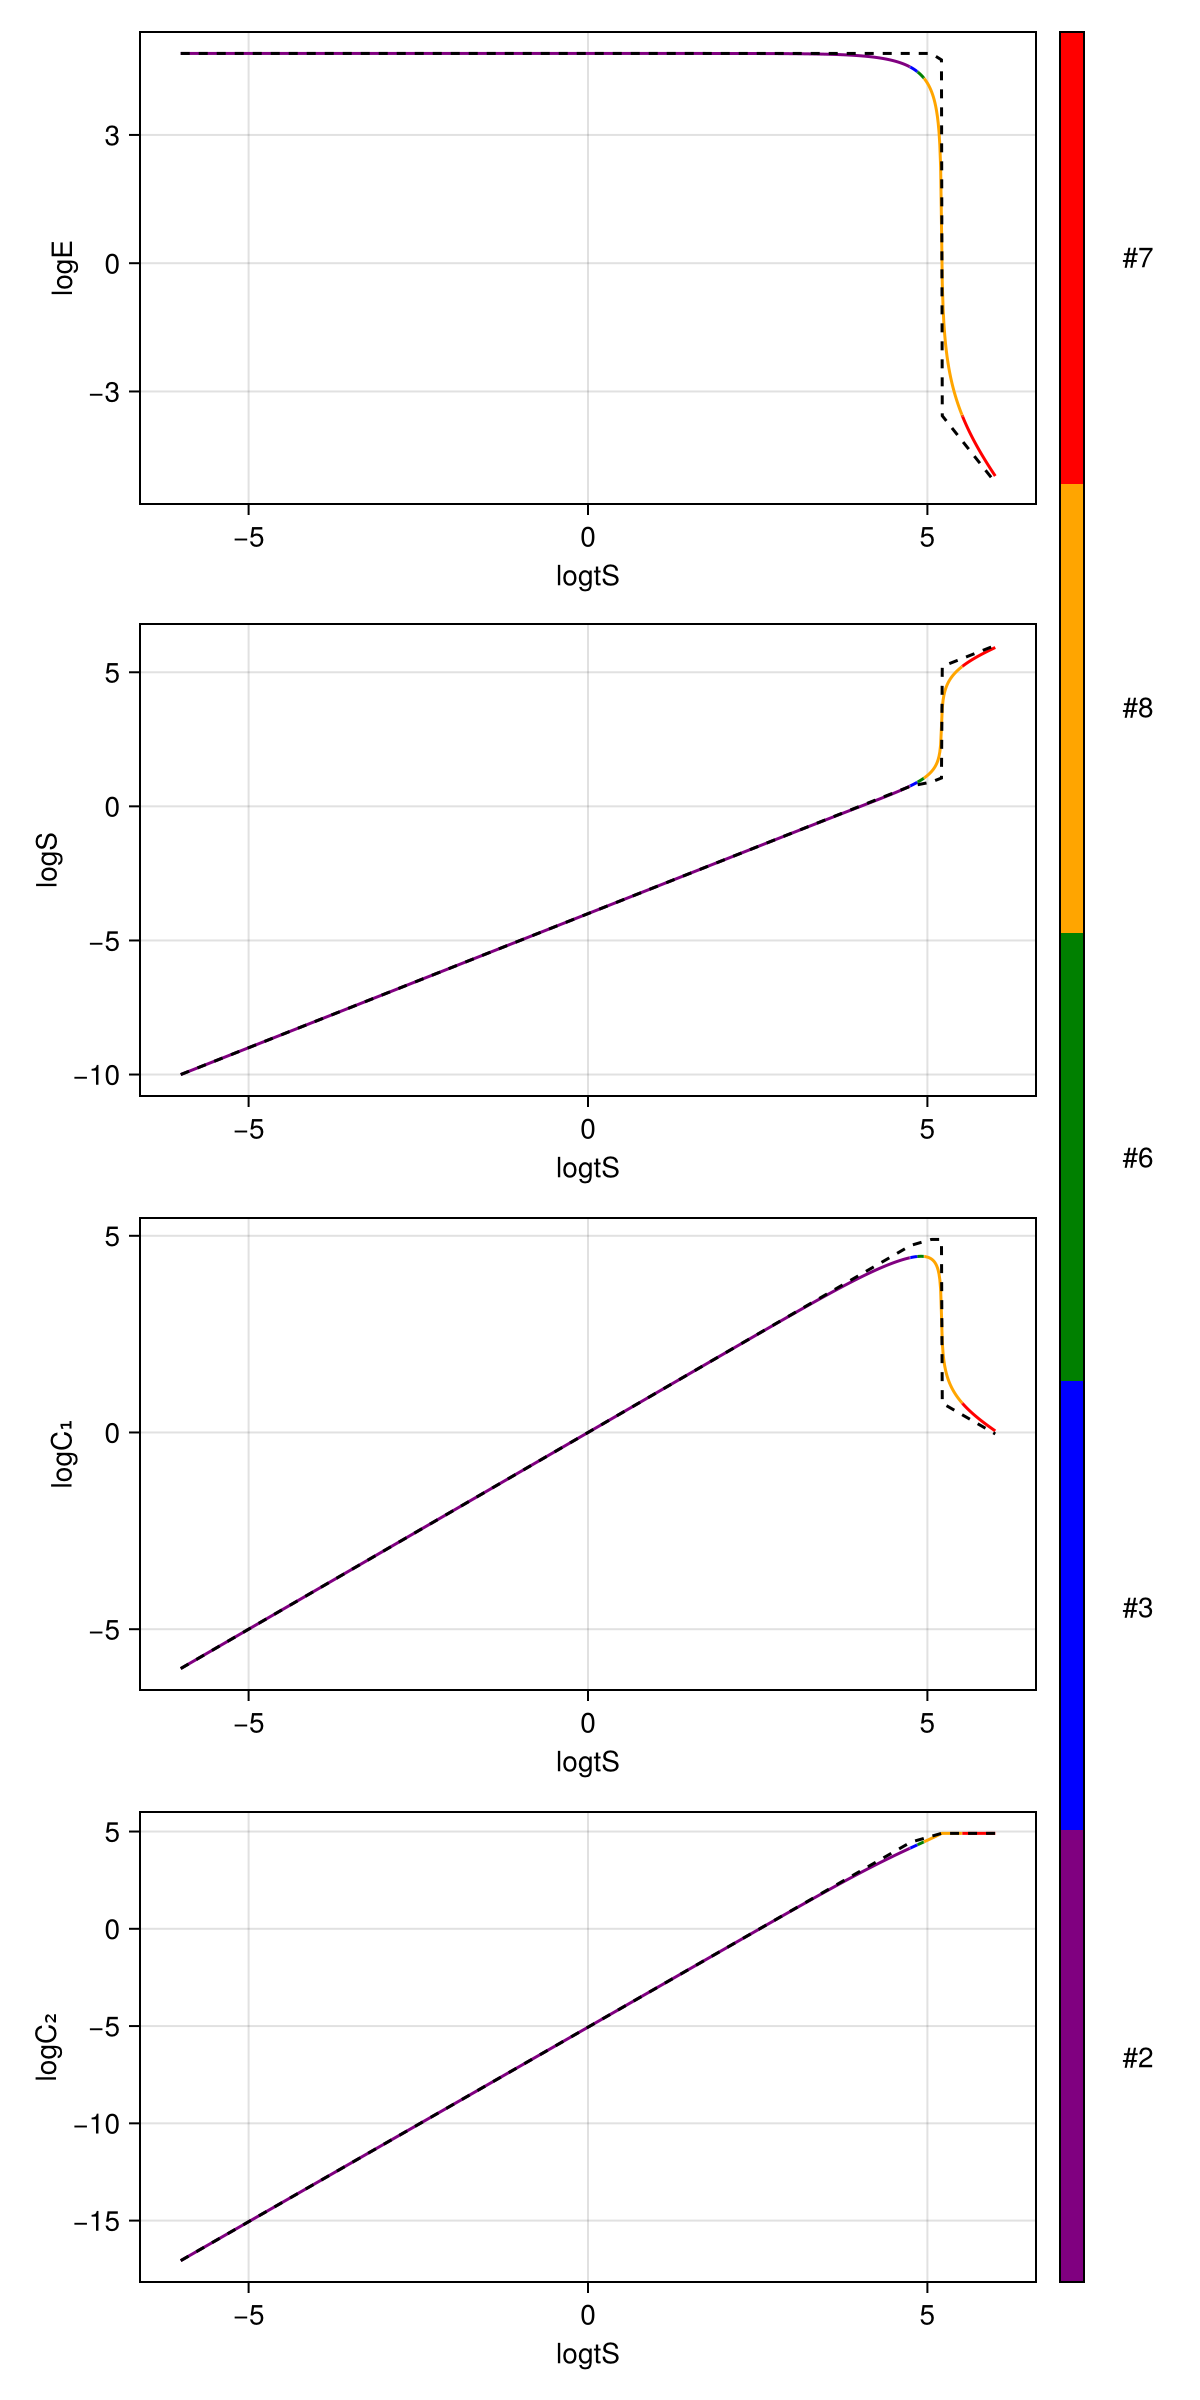

CairoMakie.Screen{IMAGE}


In [277]:
f = SISO_plot(grh1,5;add_archeatype_lines=true, start=-6,stop=6,size=(600,1200),rand_line=true,extend=4)
display(f)

In [159]:
(expr, bounds) = get_expression_for_path(grh2, 4, :C₂; log_space=false)
expr .|> display
println("----------")
bounds .|> display

(tE*(tS^2.0)) / (K_E*K_S)

0.5tS

tE

----------


(0.5K_E*K_S) / tE

2.0tE

2-element Vector{Nothing}:
 nothing
 nothing

In [153]:
show_condition_path(grh2, 2;log_space=false)

2-element Vector{Num}:
       K_E > tE
 (4.0K_E) > K_S

In [91]:
get_volume!(model2,1)[1] + get_volume!(model1,2)[1] + get_volume!(model1,4)[1]

0.7157697793958532

In [216]:
q_sym = [:tE, :tS]
K_sym = [:K₁, :K₂,:K₃]
# K_sym2 = [:K_S, :K_E]
x_sym = [:E, :S, :C₁, :C₂, :C₃]
# x_sym2 = [:E, :S, :C_S, :C₂]
N1 =     [0  2  -1  0  0;
           1  1  0  -1  0
          1  0  1   0  -1]

N2 =     [0  2  -1  0  0;
           1  1  0  -1  0
          0  1  0   1  -1]

model1 = Bnc(N=N1, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)
model2 = Bnc(N=N2, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

find_all_vertices!(model1)
find_all_vertices!(model2)
summary(model1)
summary(model2)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 11 vertices found and 10 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 11 vertices found and 10 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 5
Number of conserved quantities (d): 2
Number of reactions (r): 3
L matrix: [1 0 0 1 1; 0 1 2 1 2]
N matrix: [0 2 -1 0 0; 1 1 0 -1 0; 1 0 1 0 -1]
Direction of binding r

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 8
[ Info: All regimes converged after 4800000 samples.
[ Info: Total samples: 4800000, Elapsed: 1.35 s


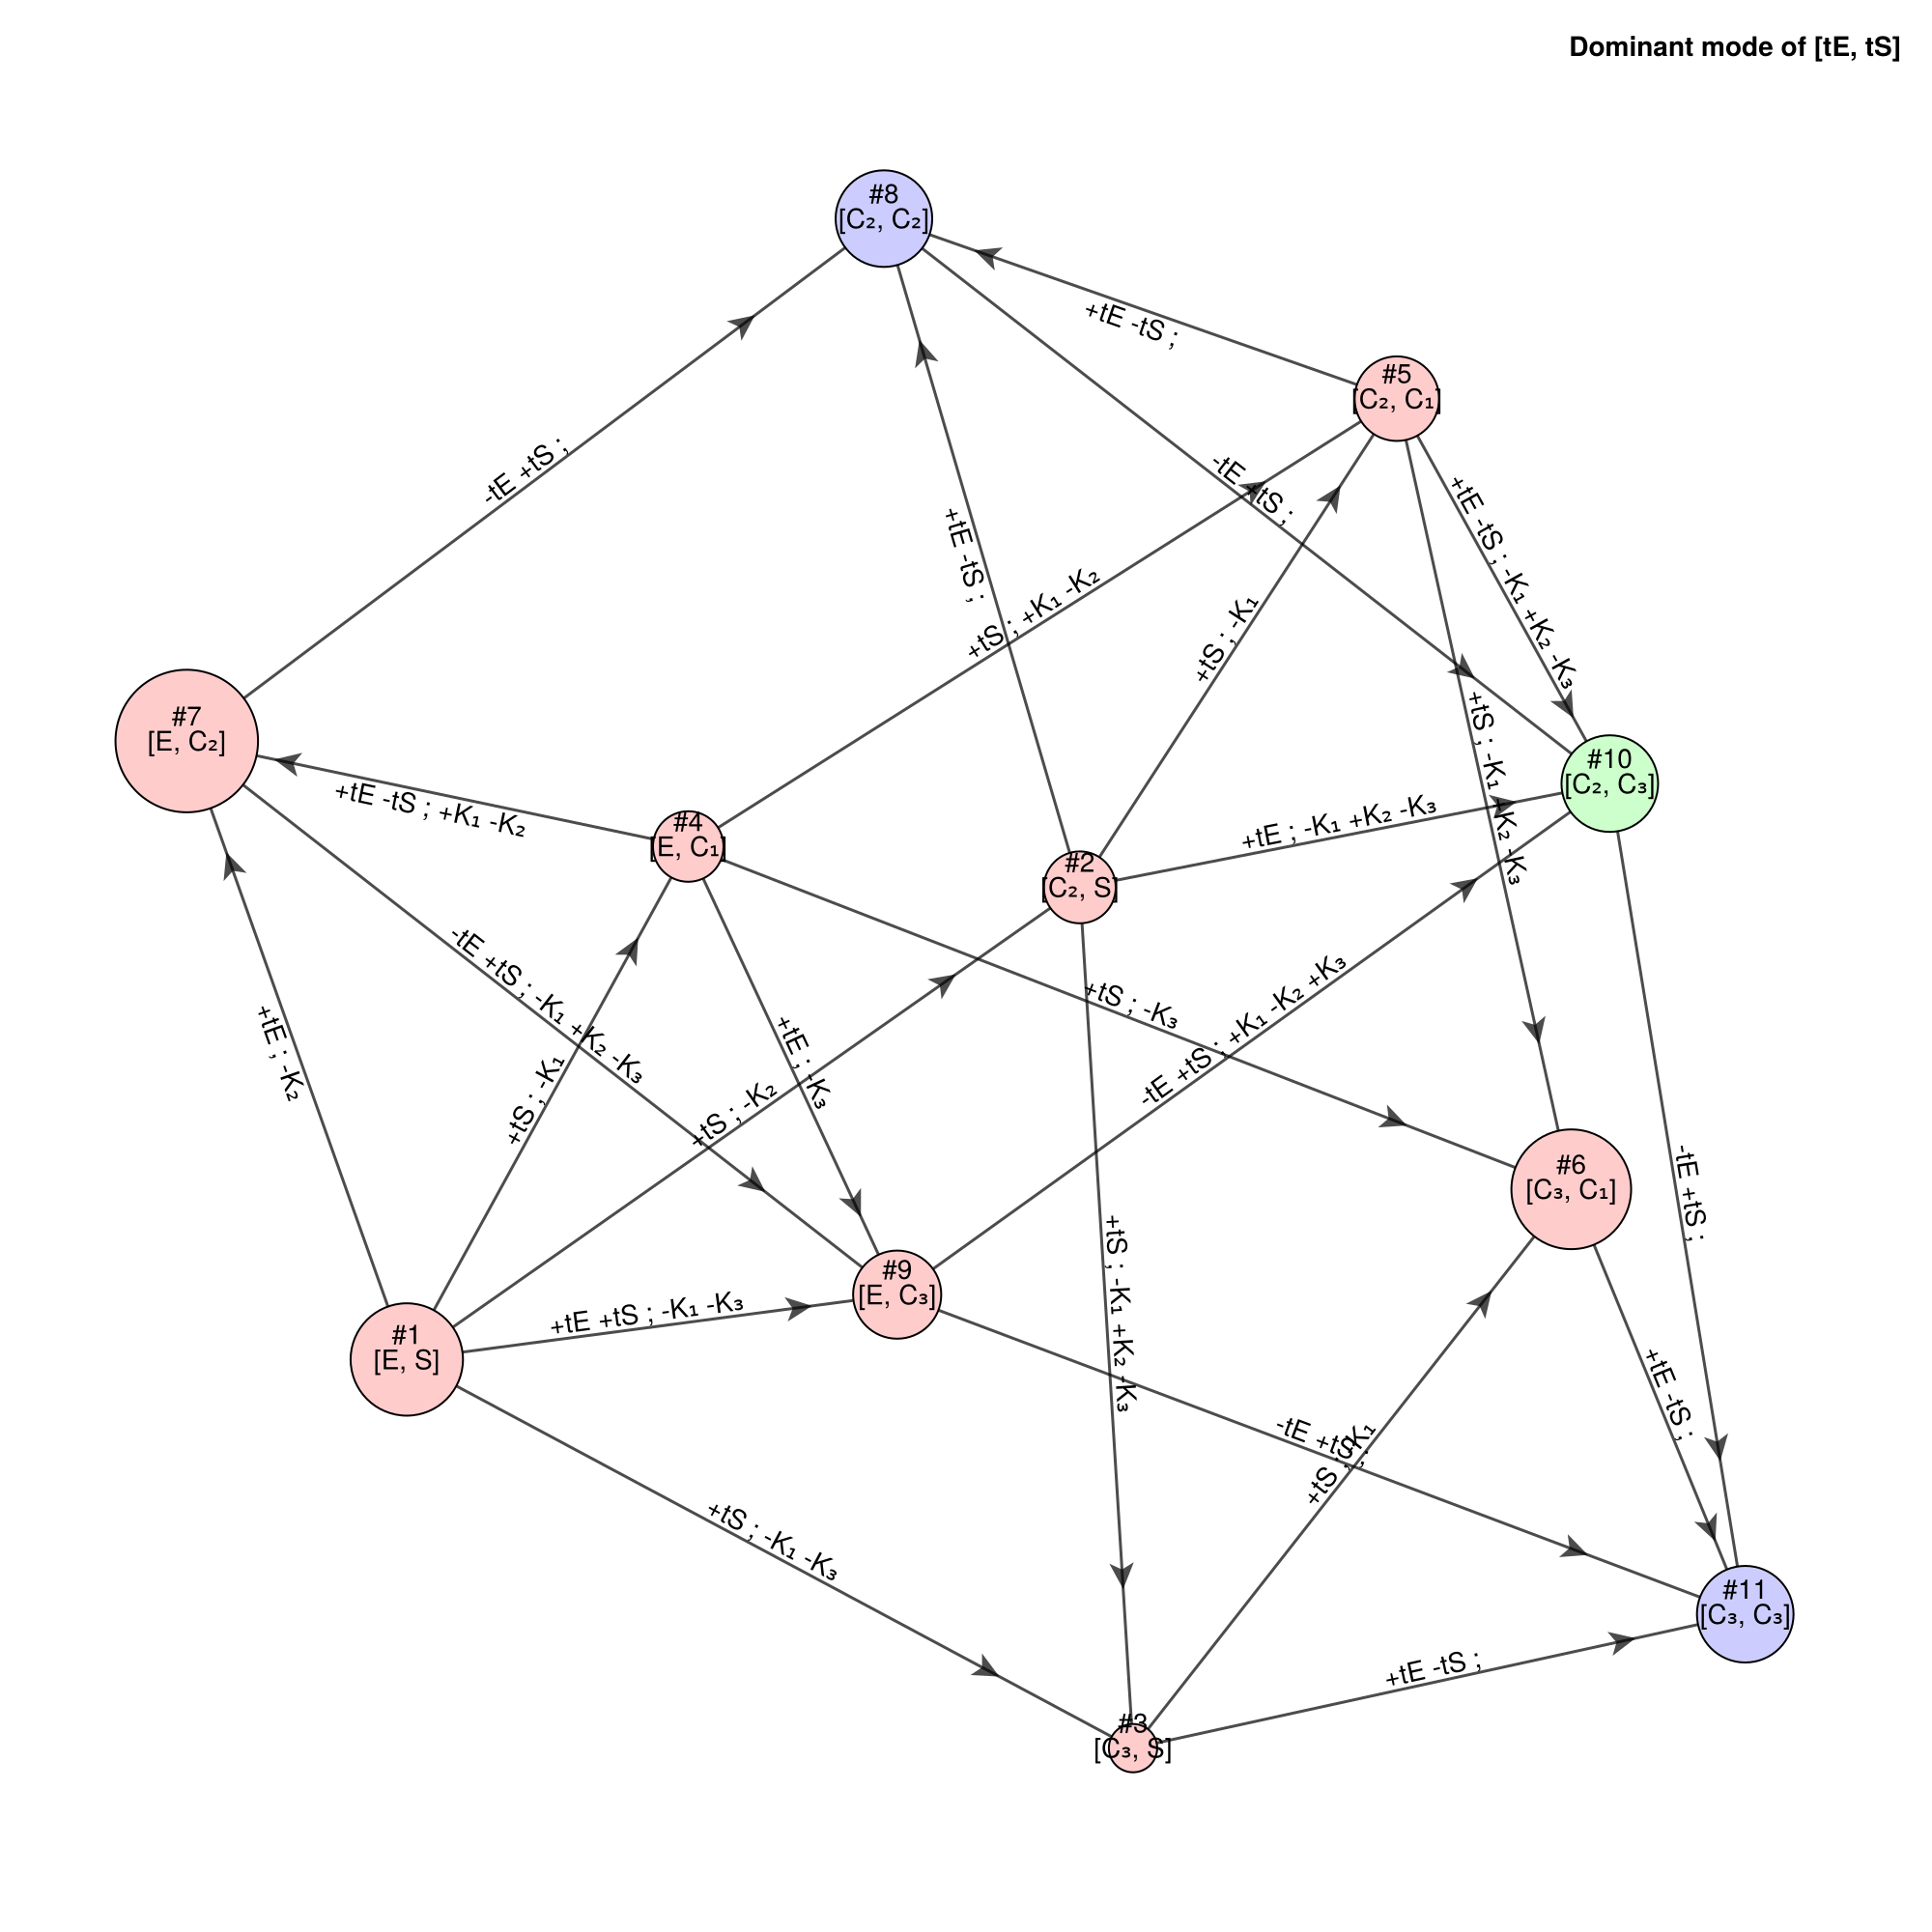

CairoMakie.Screen{IMAGE}


In [217]:
f,ax,p = draw_vertices_neighbor_graph(model1)
add_vertices_idx!(ax,p)
display(f)

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 8
[ Info: All regimes converged after 4500000 samples.
[ Info: Total samples: 4500000, Elapsed: 0.89 s


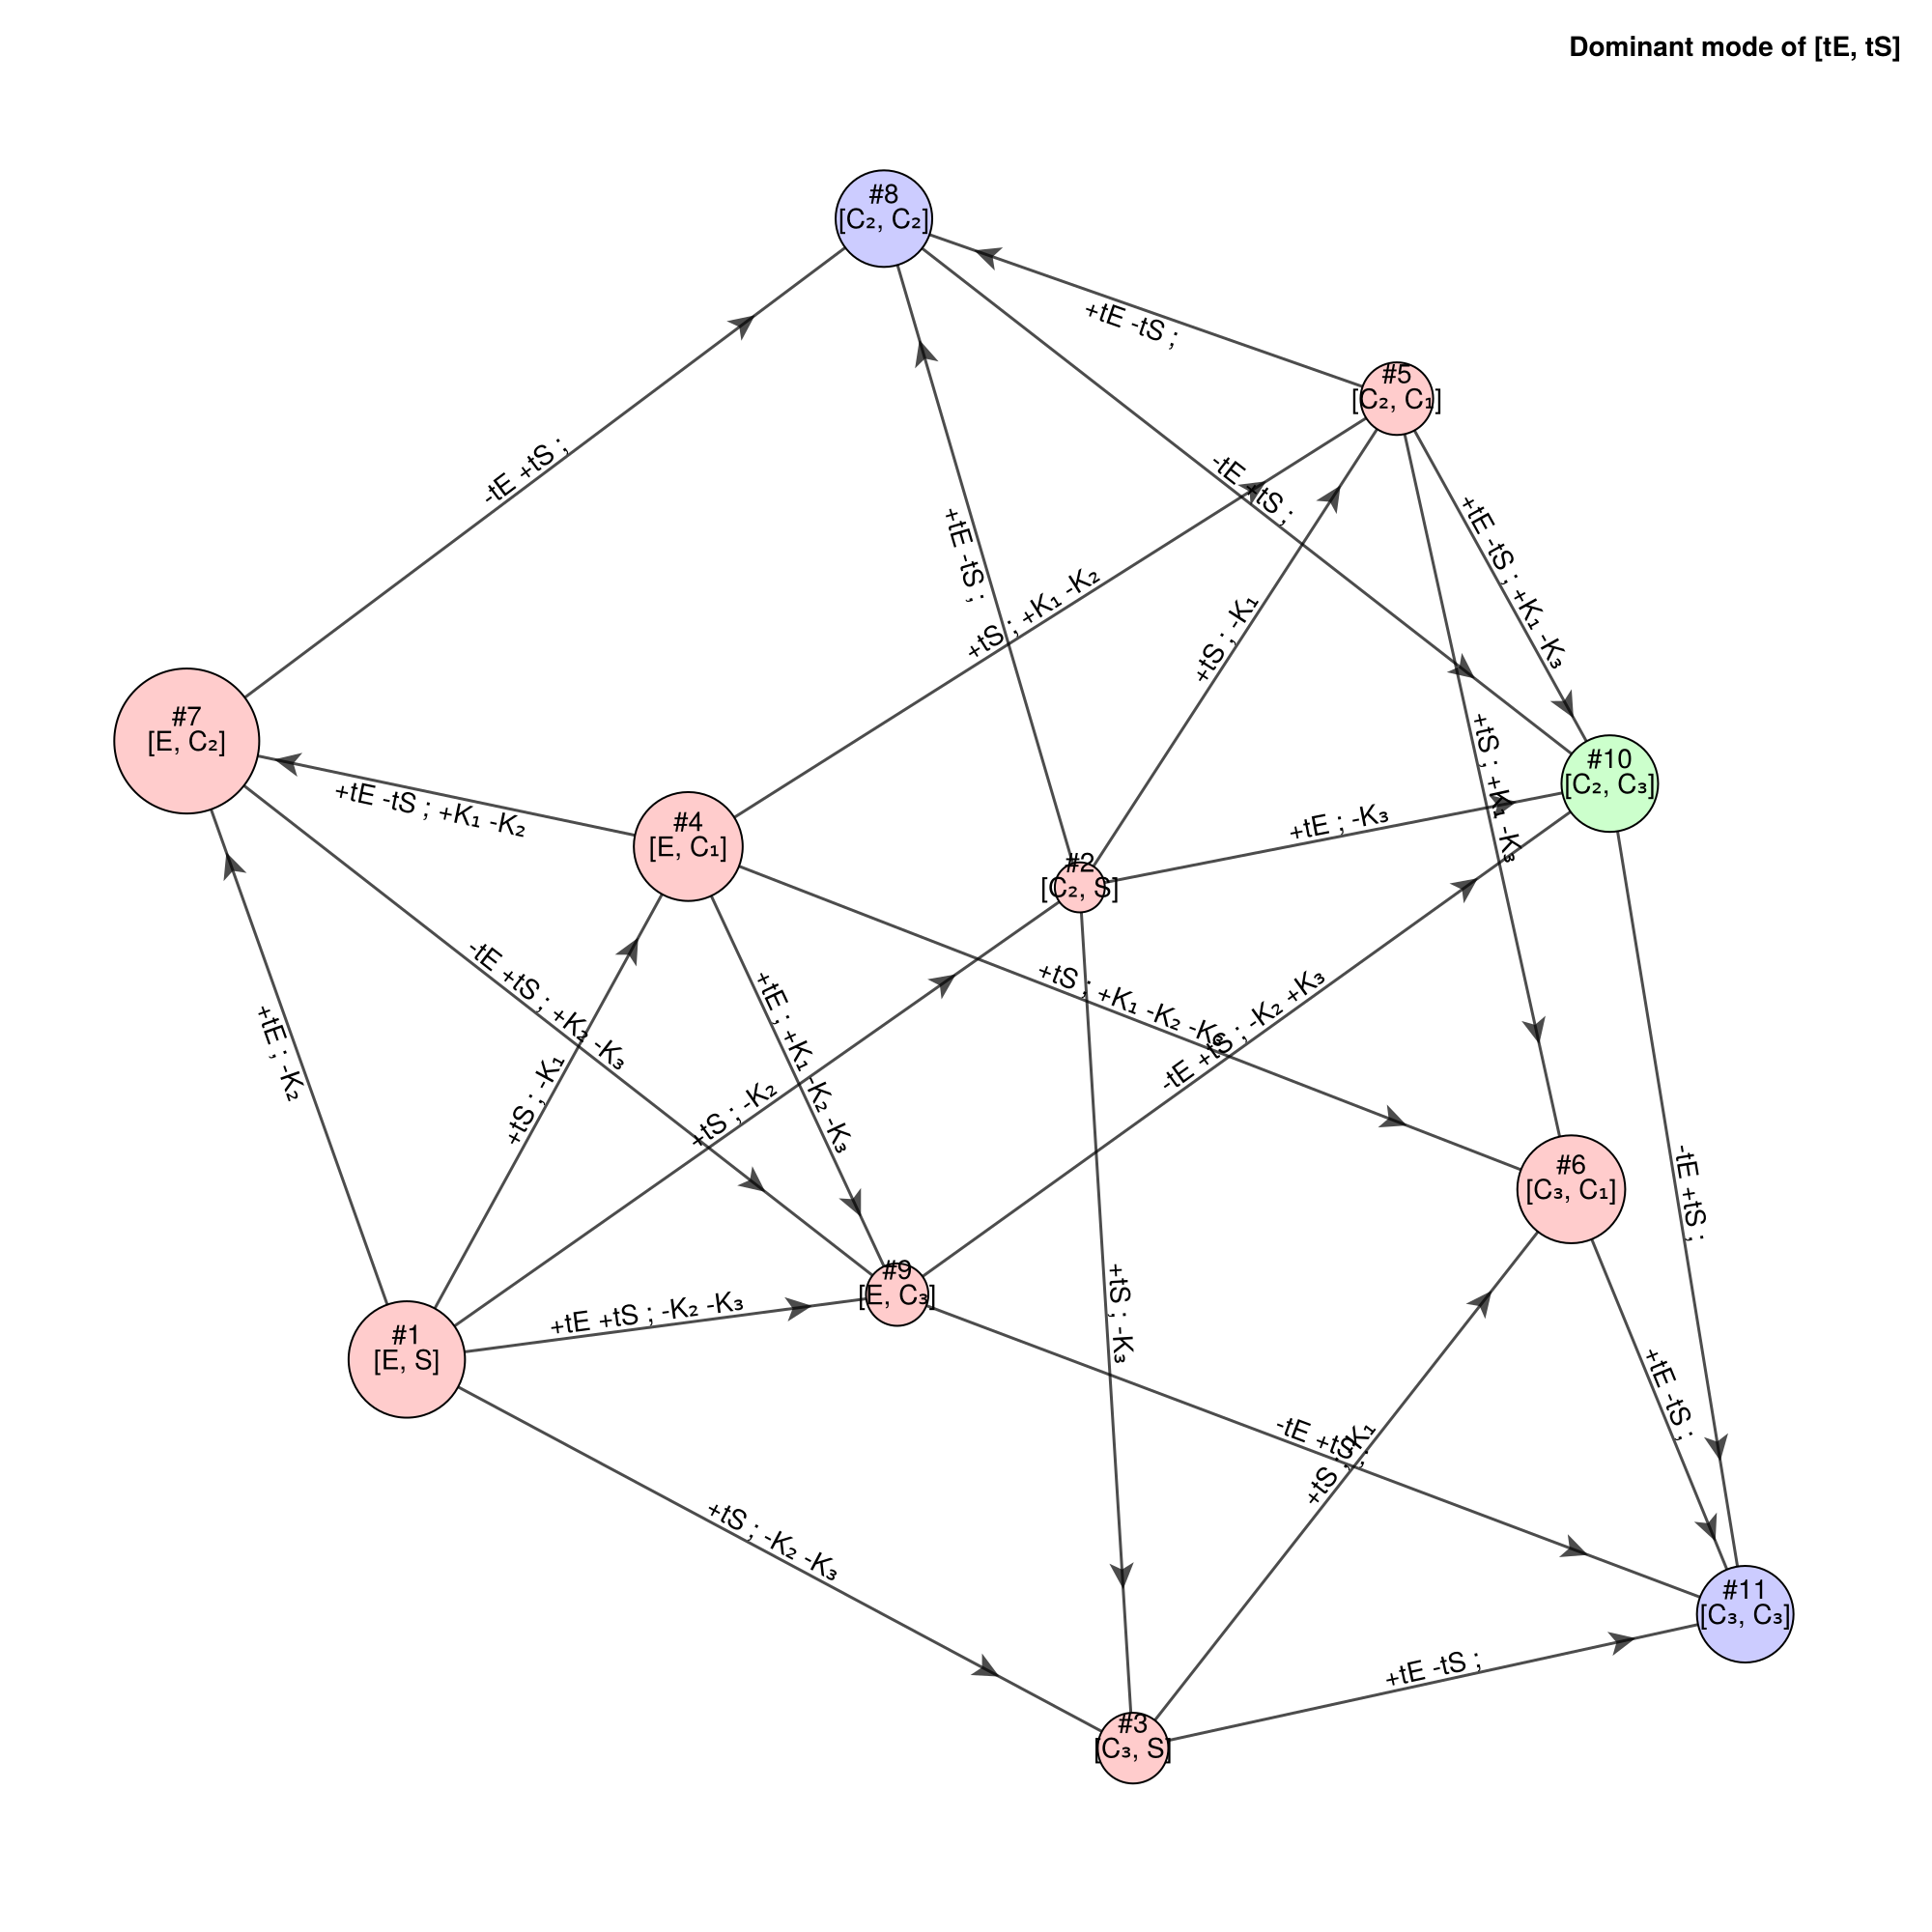

CairoMakie.Screen{IMAGE}


In [218]:
f,ax,p = draw_vertices_neighbor_graph(model2)
add_vertices_idx!(ax,p)
display(f)

In [219]:
grh1 = get_siso_graph(model1, :tS)
grh2 = get_siso_graph(model2, :tS)

[ Info: sources: [7, 1]
[ Info: sinks: [6]
[ Info: Number of polyhedra to calc volume: 16
[ Info: All regimes converged after 14700000 samples.
[ Info: Total samples: 14700000, Elapsed: 5.3 s
[ Info: sources: [7, 1]
[ Info: sinks: [6]
[ Info: Number of polyhedra to calc volume: 16
[ Info: All regimes converged after 7300000 samples.
[ Info: Total samples: 7300000, Elapsed: 2.66 s


SISO_graph{Int8}(Bnc{Int8}([0 2 … 0 0; 1 1 … -1 0; 0 1 … 1 -1], [1 0 … 1 1; 0 1 … 1 2], 3, 5, 2, Num[E, S, C₁, C₂, C₃], Num[tE, tS], Num[K₁, K₂, K₃], nothing, Vector{Int8}[[1, 2], [4, 2], [5, 2], [1, 3], [4, 3], [5, 3], [1, 4], [4, 4], [1, 5], [4, 5], [5, 5]], Dict{Vector{Int8}, Int64}([5, 5] => 11, [4, 2] => 2, [1, 4] => 7, [1, 2] => 1, [4, 3] => 5, [4, 5] => 10, [1, 3] => 4, [5, 2] => 3, [1, 5] => 9, [5, 3] => 6…), Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], Int8[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], VertexGraph{Int8}(Vector{VertexEdge{Int8}}[[VertexEdge{Int8}(2, 1, sparsevec(Int8[1, 4], Int8[-1, 1], 5), sparsevec(Int8[2, 4], [1.0, -1.0], 5)), VertexEdge{Int8}(3, 1, sparsevec(Int8[1, 5], Int8[-1, 1], 5), sparsevec(Int8[2, 4, 5], [2.0, -1.0, -1.0], 5)), VertexEdge{Int8}(4, 2, sparsevec(Int8[2, 3], Int8[-1, 1], 5), sparsevec(Int8[2, 3], [1.0, -1.0], 5)), VertexEdge{Int8}(7, 2, sparsevec(Int8[2, 4], Int8[-1, 1], 5), sparsevec(Int8[1, 4], [1.0, -1.0], 5)), VertexEdge{Int8}(9, 2, sparsevec(Int8[2,

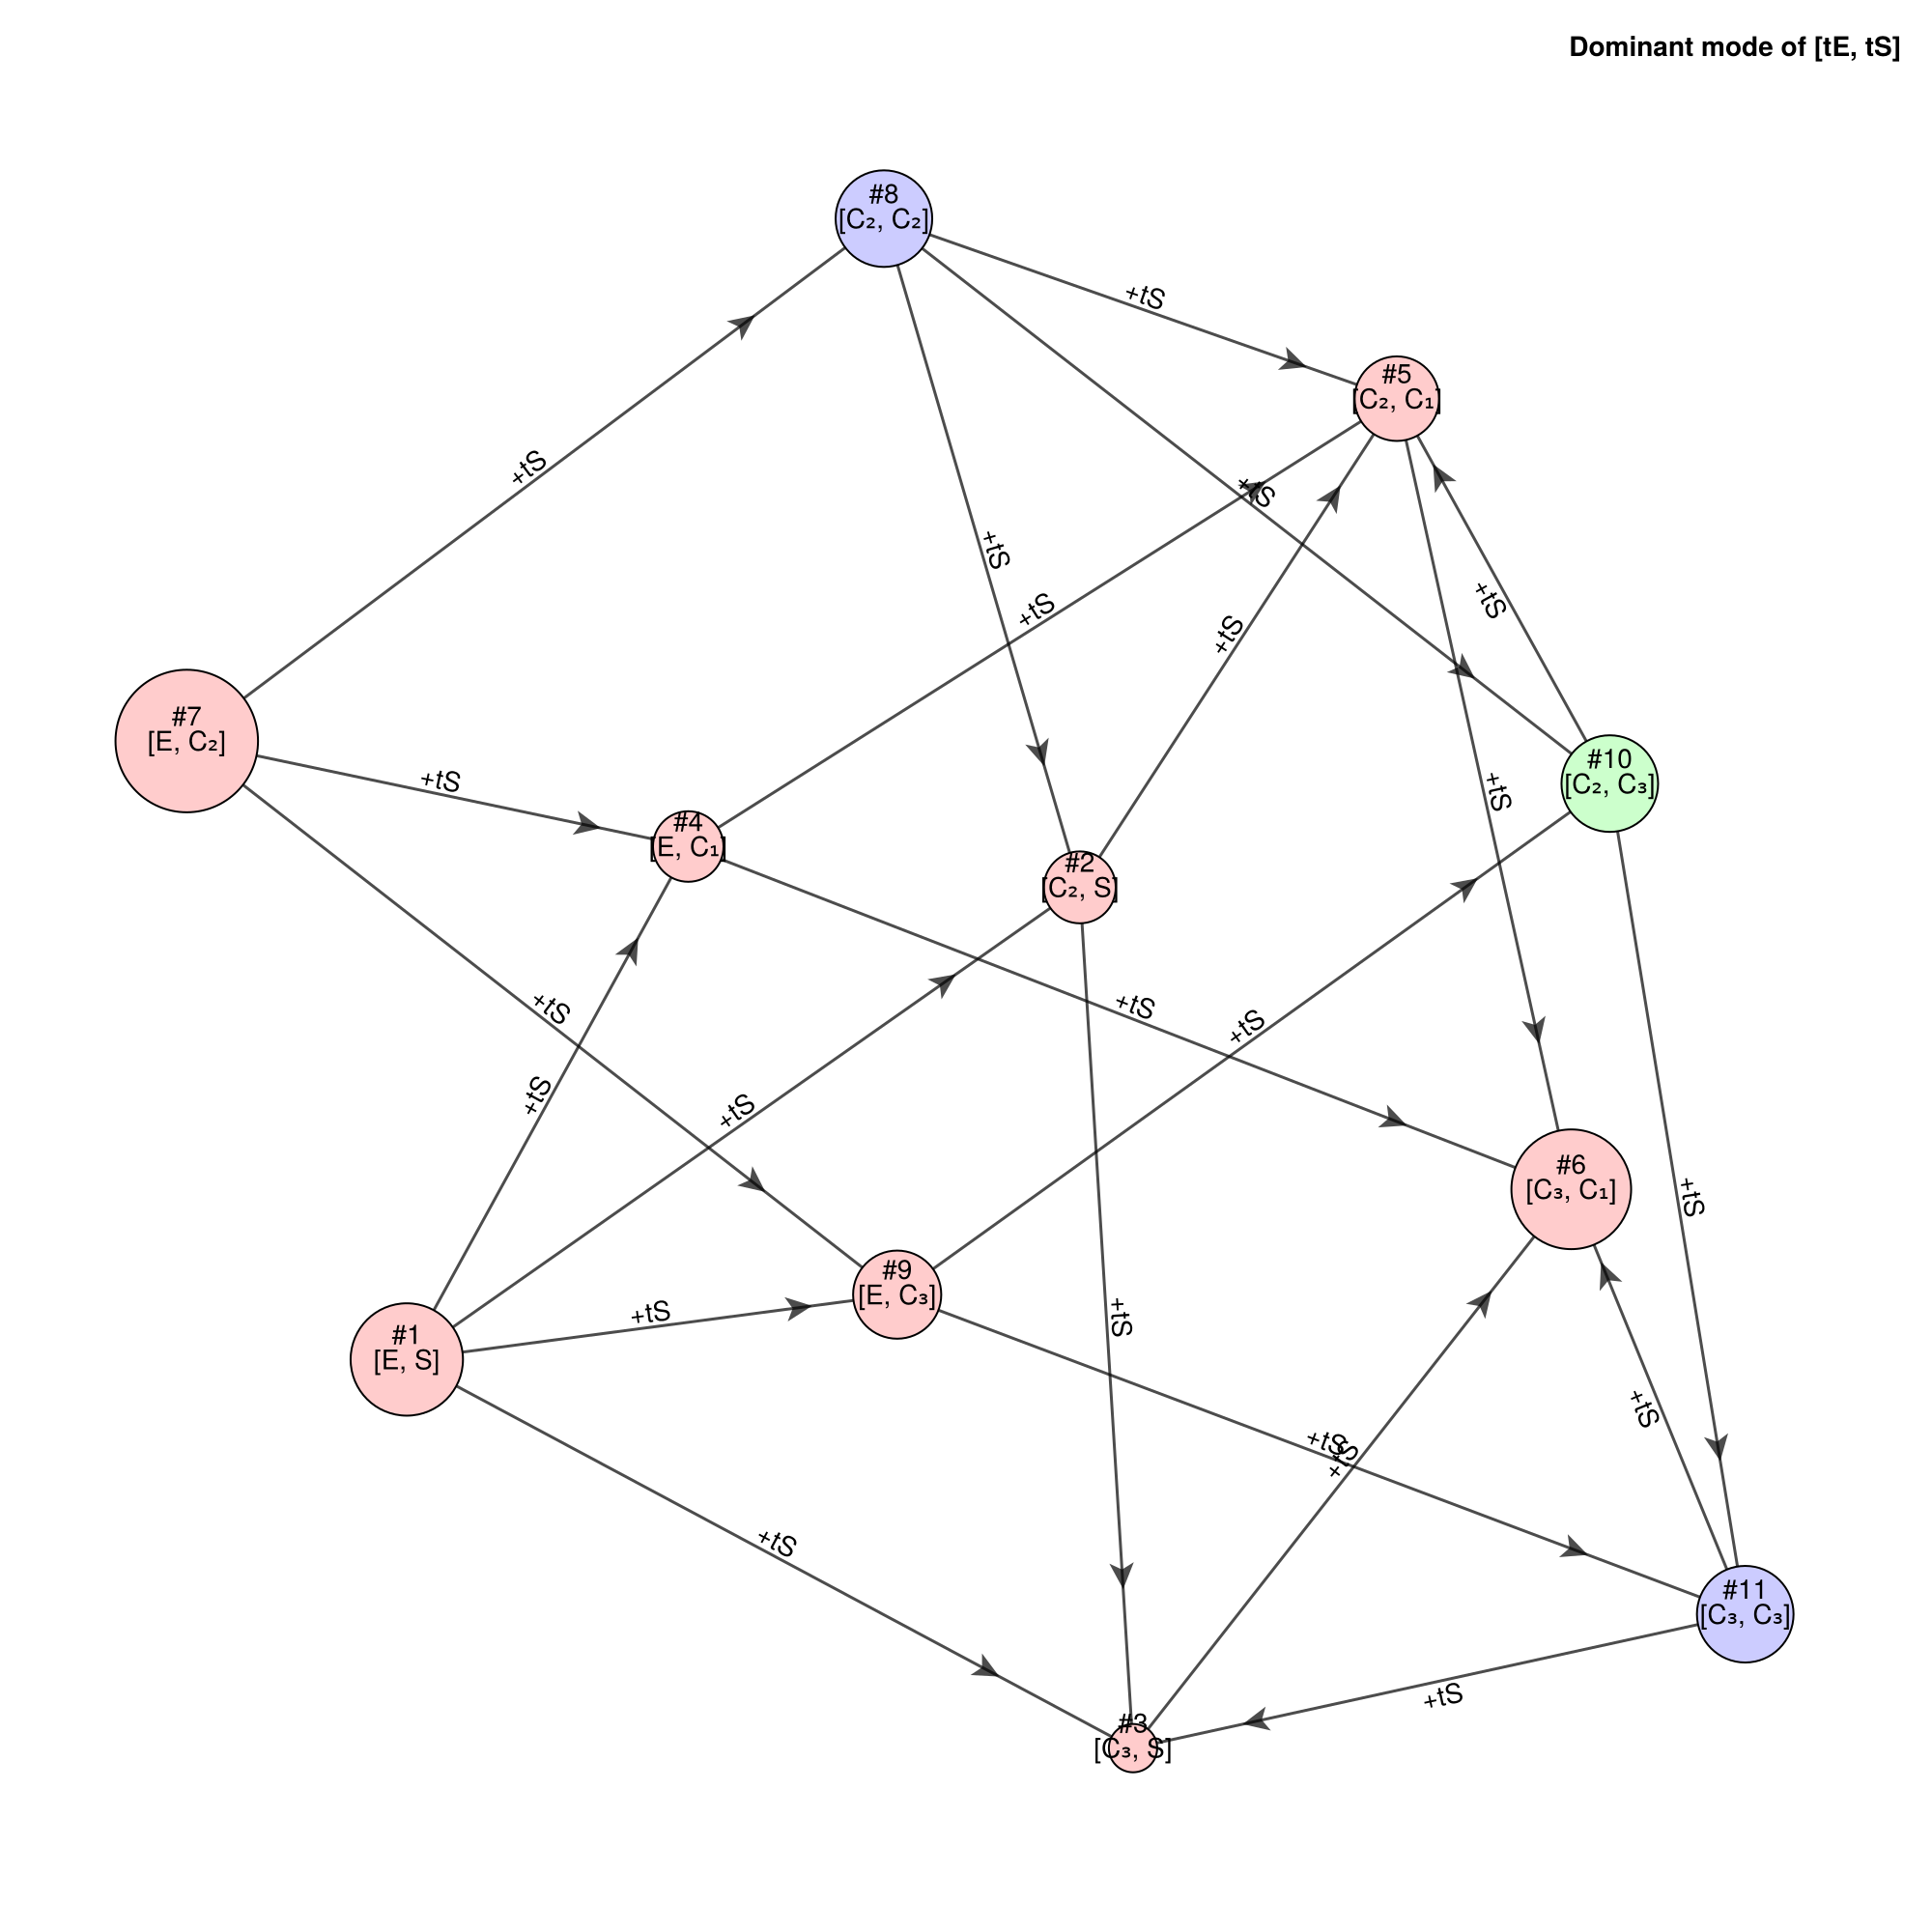

CairoMakie.Screen{IMAGE}


In [230]:
f,ax,p = draw_vertices_neighbor_graph(grh1)
add_vertices_idx!(ax,p)
display(f)

In [220]:
find_reaction_order_for_path(grh1,:C₃;keep_singular=true,keep_nonasymptotic=true)

23-element Vector{Vector{<:Real}}:
 [2.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, 1.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0]
 [2.0, Inf, 1.0, 0.5, 0.0]
 [2.0, Inf, 0.5, 0.0]
 [2.0, Inf, 1.0, 0.5, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]

In [224]:
a, b = get_expression_for_path(grh1, 3, :C₃; log_space=false)
a .|> display
println("----------")
b .|> display

grh1.rgm_volume[3]

(tE*(tS^2.0)) / (K₁*K₃)

tE

tE

----------


(K₁^0.5)*(K₃^0.5)

0.5K₁

0.10400751513487422

In [229]:
grh1.rgm_volume .- grh2.rgm_volume

23-element Vector{Float64}:
 -0.010305322358246778
  0.04192218366574525
 -0.000395713199917172
 -0.052049144767082035
 -0.041925149080153074
  0.0
  0.0
  0.0
  5.8124953482369124e-5
  0.06211948150516383
 -0.020893623035980434
 -0.010336504836587117
 -0.020880164553209506
  0.08315157876737841
  0.03187845502666872
  0.0
 -0.03129523070337783
 -0.020653206069935245
  0.0
  0.0
  0.0
 -0.031248371361147116
  0.021761519148947167

In [227]:
grh2.rgm_volume

23-element Vector{Float64}:
 0.04165298908921334
 0.04186993330216271
 0.10440322833479139
 0.08339035316988389
 0.17706655066943428
 0.0
 0.0
 0.0
 0.03116683354235474
 0.020853813783608687
 0.03125245847382877
 0.020738197406093013
 0.04175521120235721
 0.0416488224269928
 0.10400394371610241
 0.0
 0.04170910014044992
 0.07286132041782416
 0.0
 0.0
 0.0
 0.04163965577010761
 0.10386251553273851

In [225]:
a, b = get_expression_for_path(grh2, 3, :C₃; log_space=false)
a .|> display
println("----------")
b .|> display

grh2.rgm_volume[3]

(tE*(tS^2.0)) / (K₂*K₃)

tE

tE

----------


(K₂^0.5)*(K₃^0.5)

0.5K₁

0.10440322833479139

In [221]:
find_reaction_order_for_path(grh2,:C₃;keep_singular=true,keep_nonasymptotic=true)

23-element Vector{Vector{<:Real}}:
 [2.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, 1.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0]
 [2.0, Inf, 1.0, 0.5, 0.0]
 [2.0, Inf, 0.5, 0.0]
 [2.0, Inf, 1.0, 0.5, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]

In [ ]:
function hill_N(n)
    N = zeros(Int, 3, n+2)
    return N
end